In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import random
import keras

from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint

#read csv data as frame
#path = Path(r'C:\Users\Si\Desktop\python_all\Python ML\C44TimeSeriesofStarFlux\datasets')
path = Path(r'C:\Users\Si\Desktop\python_all\python_NLTK\nltk\time_series_csv\merged_csv')
print('windowspath:',path)
path.glob('*')
list(path.glob('*'))
path=list(path.glob('*'))[0]
print('windowspath:',path)
#data=pd.read_csv(path,header=None, delimiter='\t')
#data.head()
data=pd.read_csv(path,delimiter=',')
data



Using TensorFlow backend.
C:\anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py

windowspath: C:\Users\Si\Desktop\python_all\python_NLTK\nltk\time_series_csv\merged_csv
windowspath: C:\Users\Si\Desktop\python_all\python_NLTK\nltk\time_series_csv\merged_csv\all_timeseries.csv


Unnamed: 0  0  1  2  3  4  5  6  7  8  ...  591  592  593  594  595  \
0              0  0  0  0  0  0  0  0  0  0  ...  0.0  1.0  0.0  0.0  0.0   
1              1  0  0  0  0  0  0  0  0  0  ...  0.0  0.0  0.0  0.0  0.0   
2              2  0  0  0  4  3  0  0  0  3  ...  4.0  0.0  0.0  0.0  0.0   
3              3  0  0  0  0  3  0  0  2  3  ...  0.0  0.0  2.0  0.0  0.0   
4              4  2  0  0  0  0  4  0  0  0  ...  1.0  3.0  0.0  0.0  0.0   
...          ... .. .. .. .. .. .. .. .. ..  ...  ...  ...  ...  ...  ...   
5778        5778  0  0  0  0  0  0  0  0  0  ...  4.0  0.0  0.0  2.0  0.0   
5779        5779  0  3  0  4  0  0  0  0  3  ...  0.0  4.0  0.0  0.0  0.0   
5780        5780  0  0  0  0  0  0  0  0  0  ...  3.0  0.0  2.0  0.0  0.0   
5781        5781  0  0  0  0  0  0  2  0  0  ...  0.0  0.0  0.0  1.0  0.0   
5782        5782  0  3  0  0  3  0  0  0  0  ...  0.0  0.0  0.0  0.0  0.0   

      596  597  598  599  LABEL  
0     0.0  0.0  4.0  0.0      2  
1     3.0  0.0  0.0  0.0      2  
2     0.0  0.0  0.0  0.0      2  
3     0.0  0.0  0.0  2.0      2  
4     0.0  0.0  0.0  0.0      2  
...   ...  ...  ...  ...    ...  
5778  0.0  0.0  4.0  0.0      1  
5779  4.0  0.0  0.0  0.0      1  
5780  2.0  0.0  0.0  2.0      1  
5781  0.0  0.0  0.0  0.0      1  
5782  0.0  0.0  0.0  0.0      1  

[5783 rows x 602 columns]

In [2]:
def my_makedirs(path):
    if not os.path.isdir(path):
        os.makedirs(path)

In [3]:
df=data
df.LABEL
df[df.LABEL == 0].head()

Unnamed: 0  0  1  2  3  4  5  6  7  8  ...  591  592  593  594  595  \
2498        2498  0  0  0  0  0  0  0  0  0  ...  0.0  0.0  0.0  3.0  0.0   
2499        2499  0  0  0  0  0  0  0  0  2  ...  0.0  0.0  0.0  0.0  0.0   
2500        2500  0  0  0  0  0  0  0  0  0  ...  0.0  0.0  4.0  0.0  0.0   
2501        2501  0  0  3  0  2  0  0  0  0  ...  3.0  0.0  0.0  0.0  4.0   
2502        2502  3  0  2  0  0  0  0  0  0  ...  0.0  0.0  0.0  0.0  0.0   

      596  597  598  599  LABEL  
2498  2.0  0.0  0.0  0.0      0  
2499  0.0  0.0  0.0  0.0      0  
2500  0.0  0.0  2.0  3.0      0  
2501  0.0  0.0  0.0  0.0      0  
2502  0.0  0.0  4.0  0.0      0  

[5 rows x 602 columns]

In [4]:
data = data.drop('Unnamed: 0', axis = 1)
data

0  1  2  3  4  5  6  7  8  9  ...  591  592  593  594  595  596  597  \
0     0  0  0  0  0  0  0  0  0  0  ...  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
1     0  0  0  0  0  0  0  0  0  0  ...  0.0  0.0  0.0  0.0  0.0  3.0  0.0   
2     0  0  0  4  3  0  0  0  3  0  ...  4.0  0.0  0.0  0.0  0.0  0.0  0.0   
3     0  0  0  0  3  0  0  2  3  0  ...  0.0  0.0  2.0  0.0  0.0  0.0  0.0   
4     2  0  0  0  0  4  0  0  0  0  ...  1.0  3.0  0.0  0.0  0.0  0.0  0.0   
...  .. .. .. .. .. .. .. .. .. ..  ...  ...  ...  ...  ...  ...  ...  ...   
5778  0  0  0  0  0  0  0  0  0  0  ...  4.0  0.0  0.0  2.0  0.0  0.0  0.0   
5779  0  3  0  4  0  0  0  0  3  0  ...  0.0  4.0  0.0  0.0  0.0  4.0  0.0   
5780  0  0  0  0  0  0  0  0  0  0  ...  3.0  0.0  2.0  0.0  0.0  2.0  0.0   
5781  0  0  0  0  0  0  2  0  0  0  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
5782  0  3  0  0  3  0  0  0  0  0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

      598  599  LABEL  
0     4.0  0.0      2  
1     0.0  0.0      2  
2     0.0  0.0      2  
3     0.0  2.0      2  
4     0.0  0.0      2  
...   ...  ...    ...  
5778  4.0  0.0      1  
5779  0.0  0.0      1  
5780  0.0  2.0      1  
5781  0.0  0.0      1  
5782  0.0  0.0      1  

[5783 rows x 601 columns]

In [5]:
data.shape

(5783, 601)

In [6]:
df = data

In [7]:
#divied the dataframe into two groups
data1=data[data.LABEL>=1]
data2=data[data.LABEL<1]
print('confirmed exoplanet-stars:',data2.shape, 'non-exoplanet-stars:', data1.shape)
len(data2.index),len(data1.index)
data2.index

confirmed exoplanet-stars: (2726, 601) non-exoplanet-stars: (3057, 601)


Int64Index([2498, 2499, 2500, 2501, 2502, 2503, 2504, 2505, 2506, 2507,
            ...
            5214, 5215, 5216, 5217, 5218, 5219, 5220, 5221, 5222, 5223],
           dtype='int64', length=2726)

In [8]:
df[df.LABEL>=1]

0  1  2  3  4  5  6  7  8  9  ...  591  592  593  594  595  596  597  \
0     0  0  0  0  0  0  0  0  0  0  ...  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
1     0  0  0  0  0  0  0  0  0  0  ...  0.0  0.0  0.0  0.0  0.0  3.0  0.0   
2     0  0  0  4  3  0  0  0  3  0  ...  4.0  0.0  0.0  0.0  0.0  0.0  0.0   
3     0  0  0  0  3  0  0  2  3  0  ...  0.0  0.0  2.0  0.0  0.0  0.0  0.0   
4     2  0  0  0  0  4  0  0  0  0  ...  1.0  3.0  0.0  0.0  0.0  0.0  0.0   
...  .. .. .. .. .. .. .. .. .. ..  ...  ...  ...  ...  ...  ...  ...  ...   
5778  0  0  0  0  0  0  0  0  0  0  ...  4.0  0.0  0.0  2.0  0.0  0.0  0.0   
5779  0  3  0  4  0  0  0  0  3  0  ...  0.0  4.0  0.0  0.0  0.0  4.0  0.0   
5780  0  0  0  0  0  0  0  0  0  0  ...  3.0  0.0  2.0  0.0  0.0  2.0  0.0   
5781  0  0  0  0  0  0  2  0  0  0  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
5782  0  3  0  0  3  0  0  0  0  0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

      598  599  LABEL  
0     4.0  0.0      2  
1     0.0  0.0      2  
2     0.0  0.0      2  
3     0.0  2.0      2  
4     0.0  0.0      2  
...   ...  ...    ...  
5778  4.0  0.0      1  
5779  0.0  0.0      1  
5780  0.0  2.0      1  
5781  0.0  0.0      1  
5782  0.0  0.0      1  

[3057 rows x 601 columns]

In [9]:
data2

0  1  2  3  4  5  6  7  8  9  ...  591  592  593  594  595  596  597  \
2498  0  0  0  0  0  0  0  0  0  0  ...  0.0  0.0  0.0  3.0  0.0  2.0  0.0   
2499  0  0  0  0  0  0  0  0  2  3  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2500  0  0  0  0  0  0  0  0  0  0  ...  0.0  0.0  4.0  0.0  0.0  0.0  0.0   
2501  0  0  3  0  2  0  0  0  0  0  ...  3.0  0.0  0.0  0.0  4.0  0.0  0.0   
2502  3  0  2  0  0  0  0  0  0  0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...  .. .. .. .. .. .. .. .. .. ..  ...  ...  ...  ...  ...  ...  ...  ...   
5219  0  0  0  0  2  0  4  2  0  0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
5220  0  3  0  0  2  3  0  0  0  0  ...  0.0  2.0  0.0  0.0  0.0  2.0  0.0   
5221  0  0  0  0  0  0  3  0  0  0  ...  2.0  0.0  0.0  0.0  0.0  0.0  0.0   
5222  0  1  0  0  1  3  0  0  1  3  ...  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
5223  0  0  0  0  0  0  1  0  4  0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

      598  599  LABEL  
2498  0.0  0.0      0  
2499  0.0  0.0      0  
2500  2.0  3.0      0  
2501  0.0  0.0      0  
2502  4.0  0.0      0  
...   ...  ...    ...  
5219  0.0  3.0      0  
5220  0.0  0.0      0  
5221  0.0  0.0      0  
5222  0.0  3.0      0  
5223  0.0  0.0      0  

[2726 rows x 601 columns]

C:\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_op

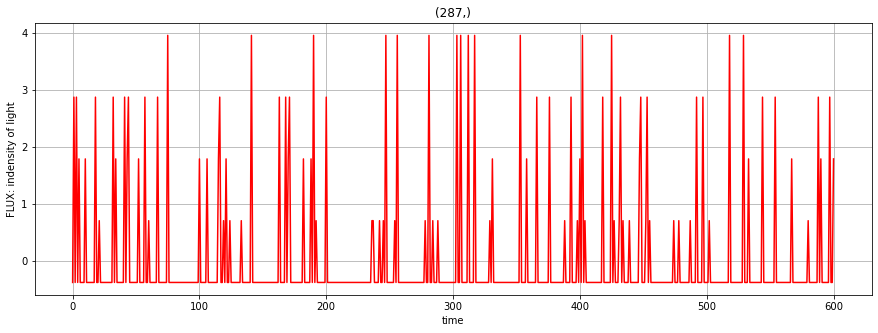

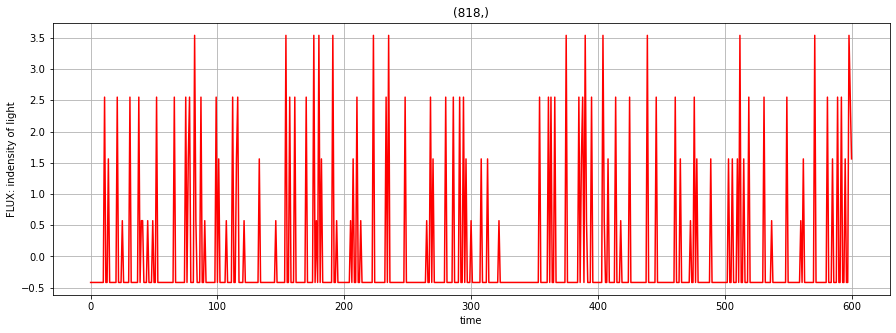

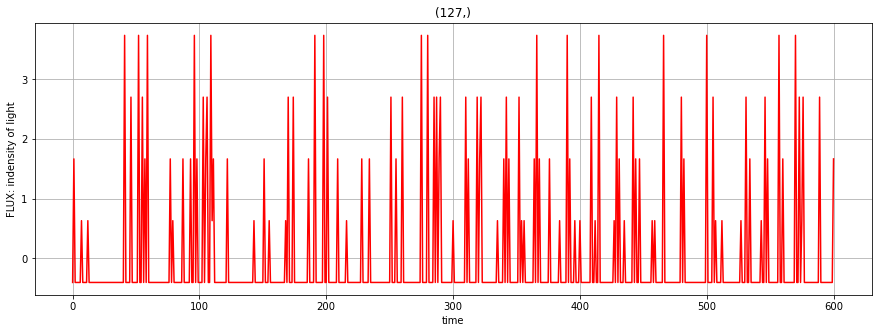

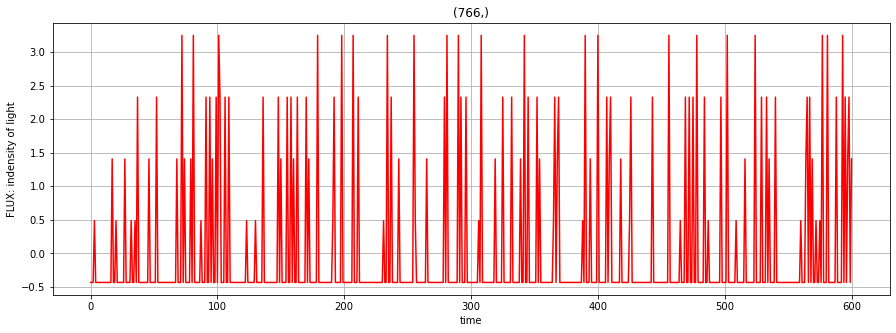

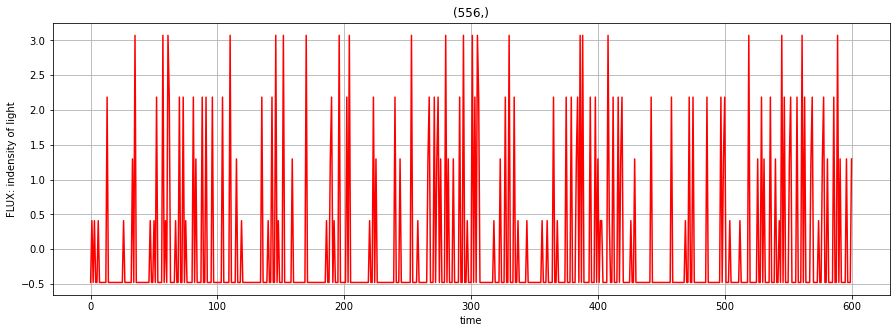

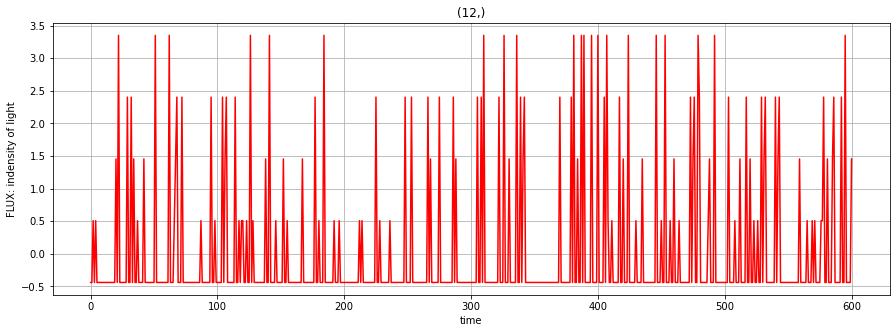

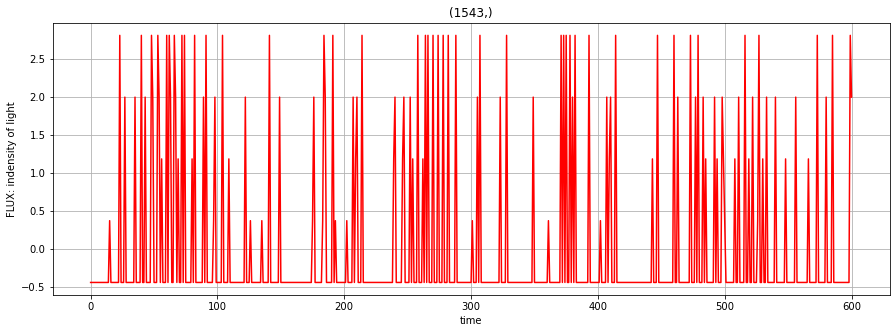

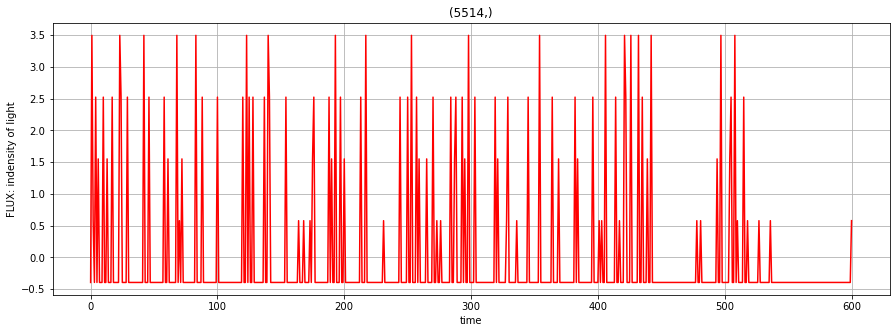

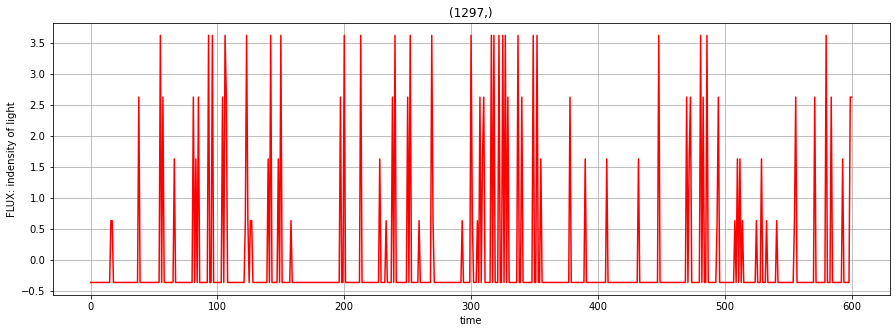

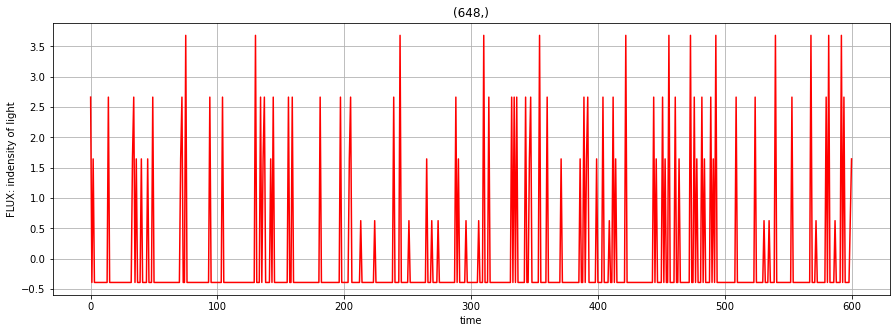

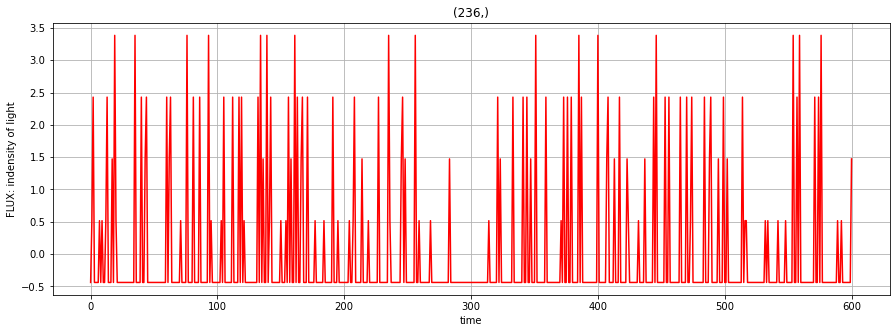

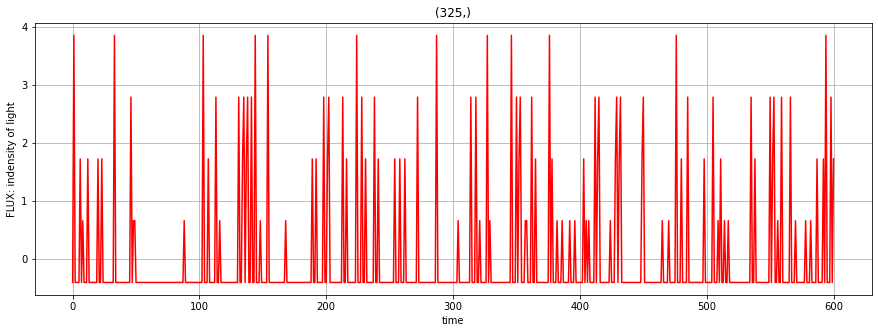

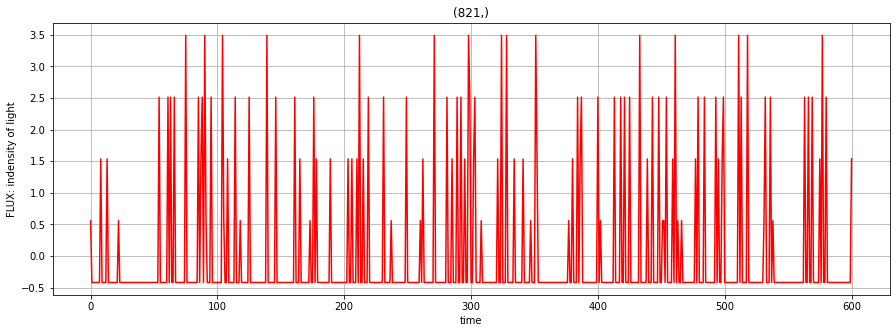

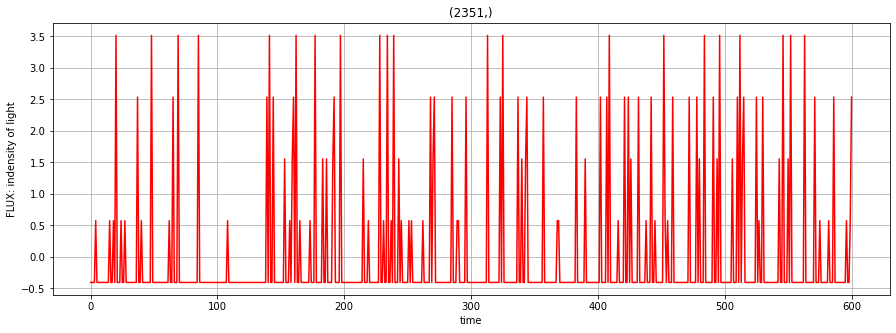

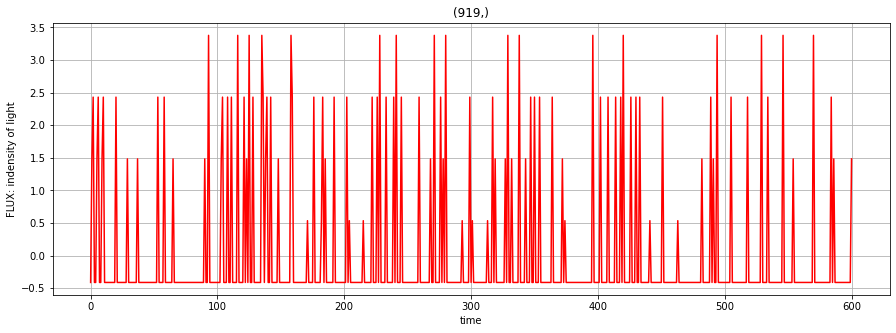

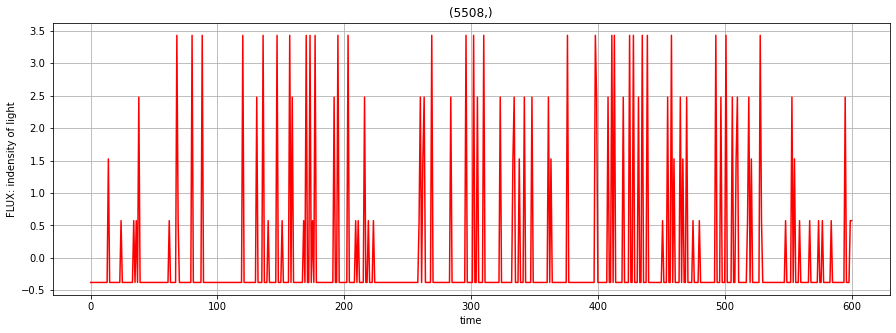

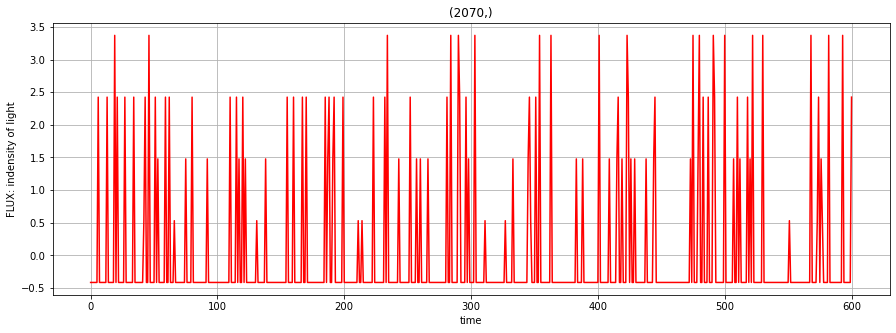

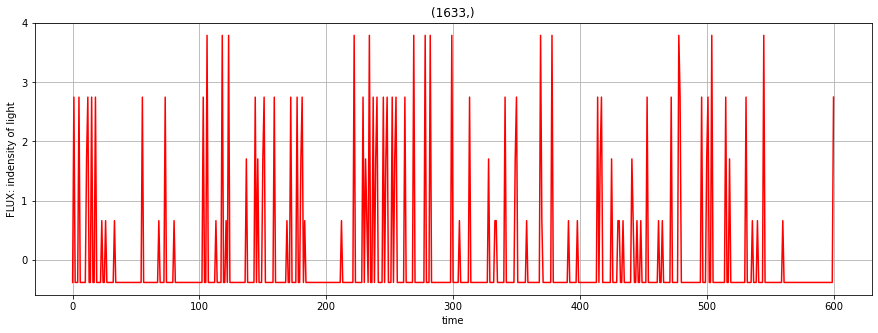

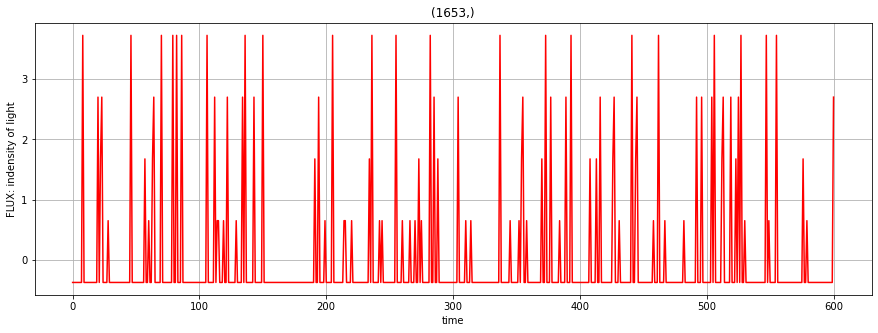

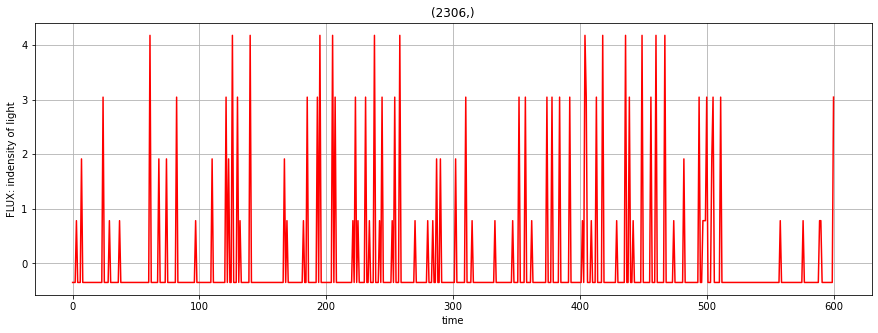

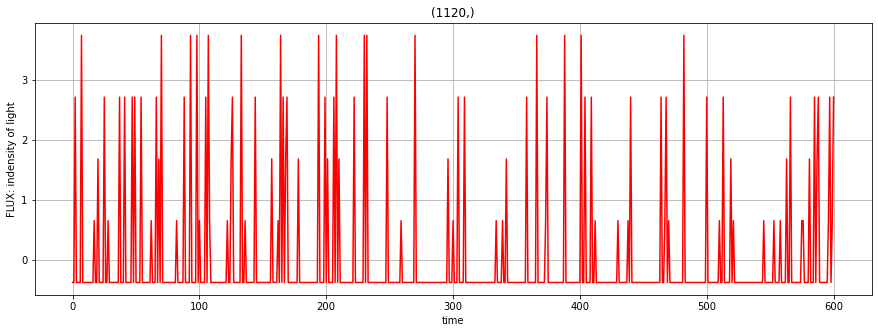

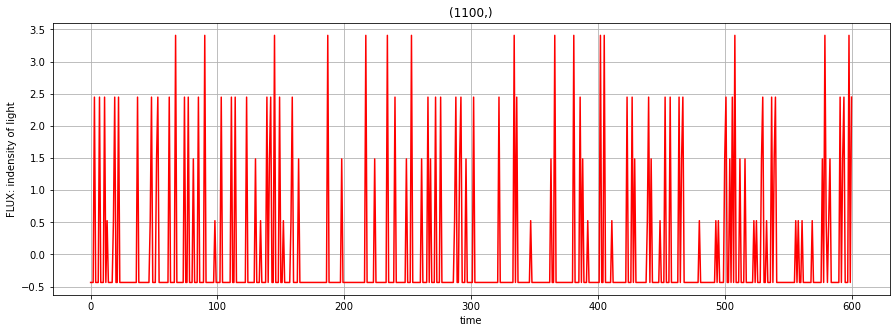

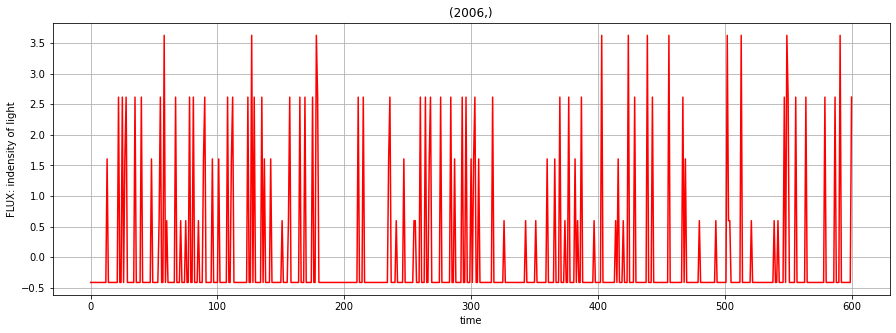

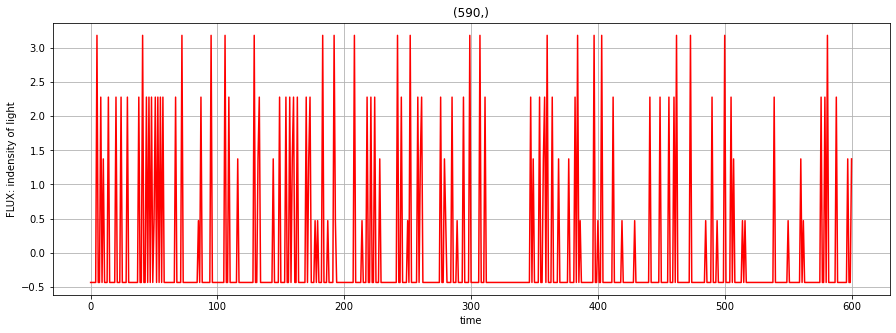

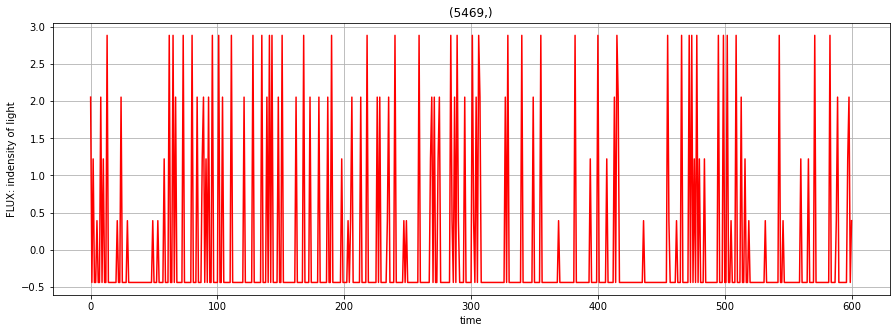

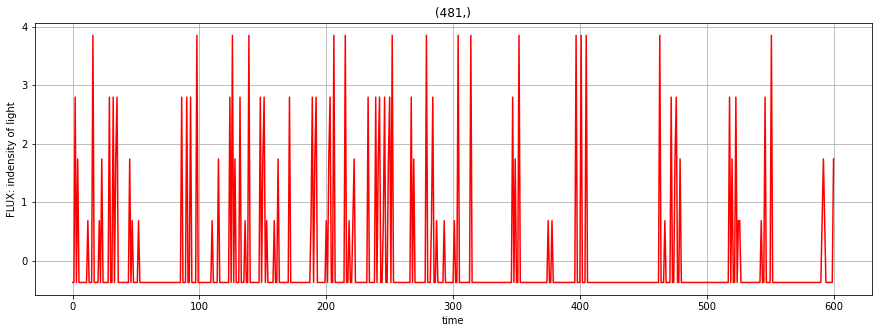

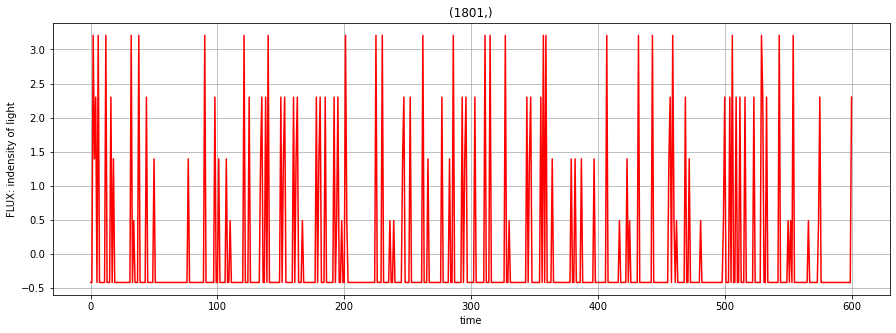

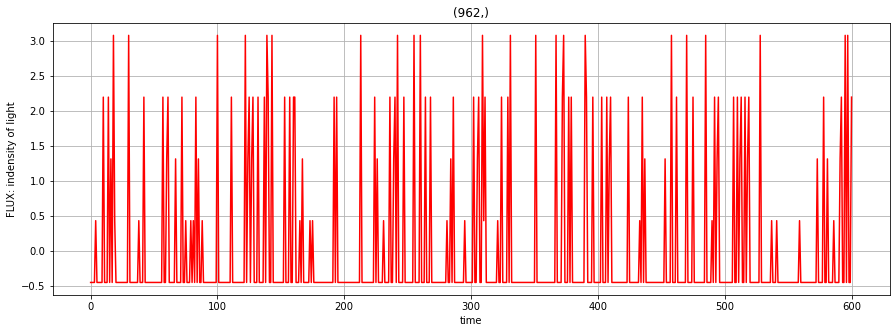

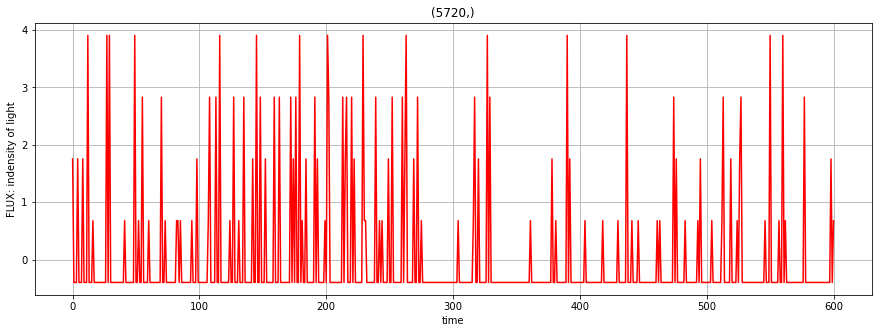

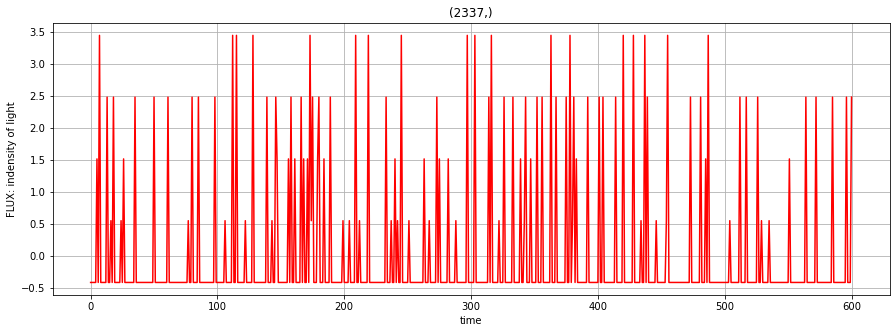

In [10]:
#standize the dataset
from sklearn.preprocessing import StandardScaler
#show data1
#randomly choose data1 sample
#randomly choose data1 sample
data1list=list(data1.index)
data1sample=random.sample(data1list,30)
data1sample=np.array(data1sample)
data1sample.shape
#len(data1sample)
#print('length of ECG data : ', len(df222))
for j in enumerate(data1sample):
    shape=data1sample.shape
    i=j[1:2] #importance! 2d array->1d array
    df1 = data1.loc[i]
    df11=df1.values
    df11.shape
    df111=df11.reshape(len(df11),-1)
    
    #normalization
    scalar= StandardScaler()
    data_stand1=scalar.fit_transform(df111)

    timeseries=np.arange(df.shape[1])

    plt.figure(figsize=(15,5))
    plt.title(i)
    plt.grid(True)
    plt.xlabel('time')
    plt.ylabel('FLUX: indensity of light')

    plt.plot(timeseries,data_stand1,color='red')


C:\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_op

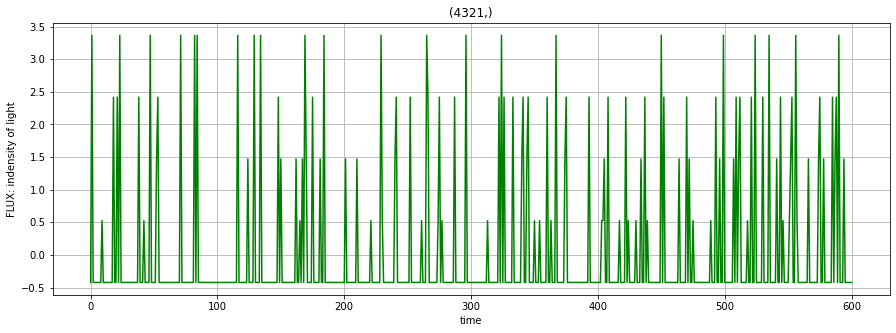

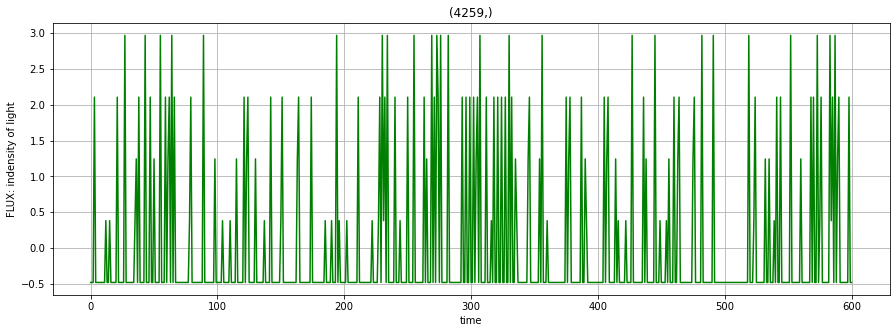

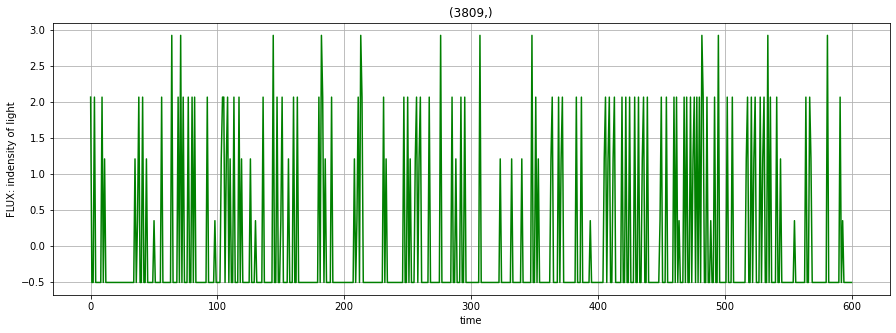

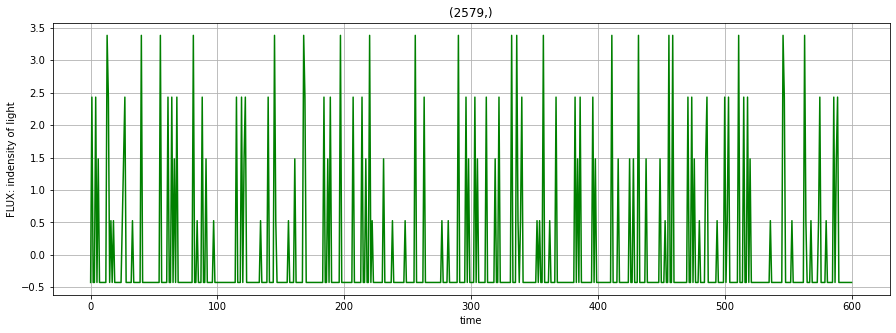

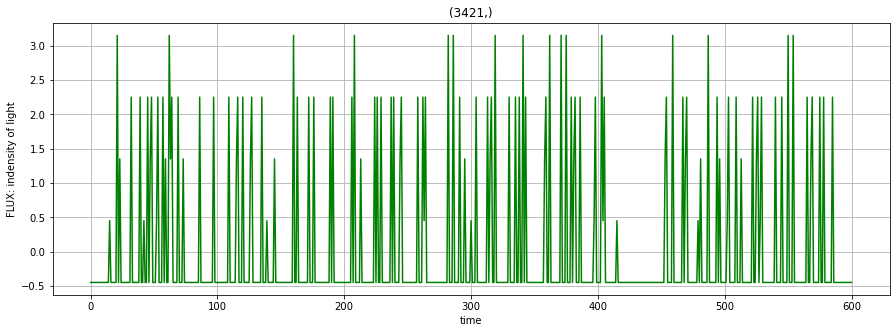

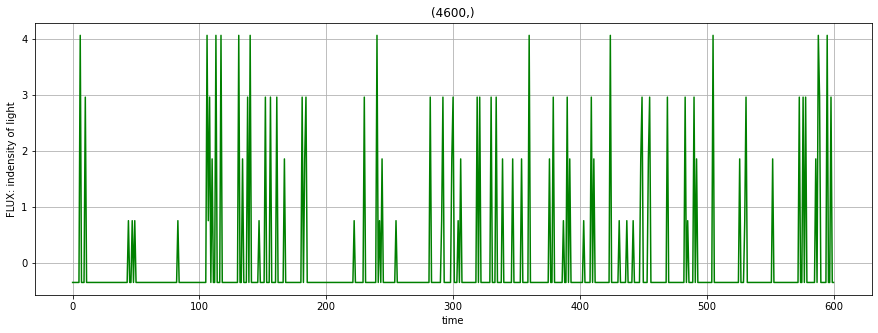

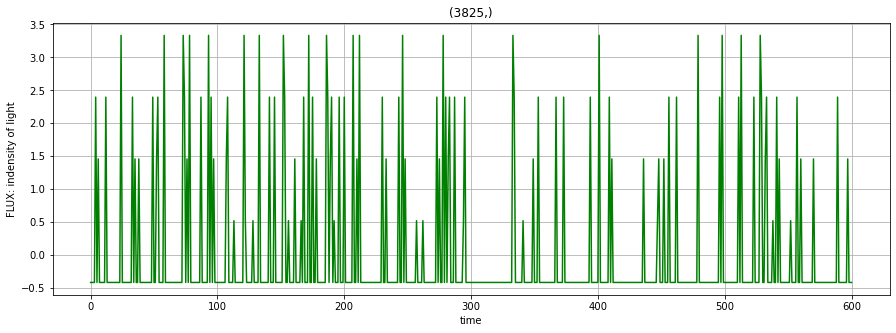

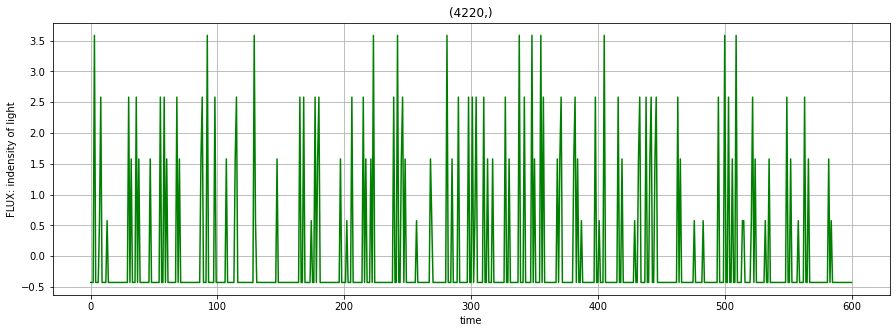

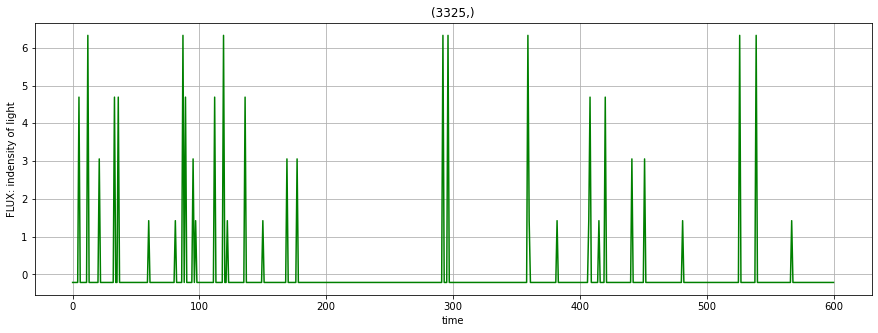

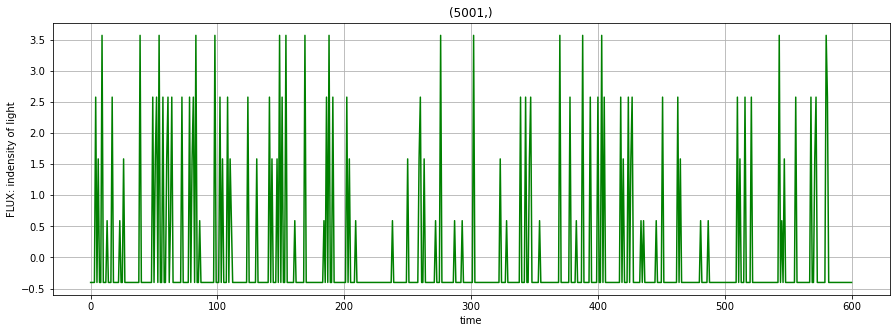

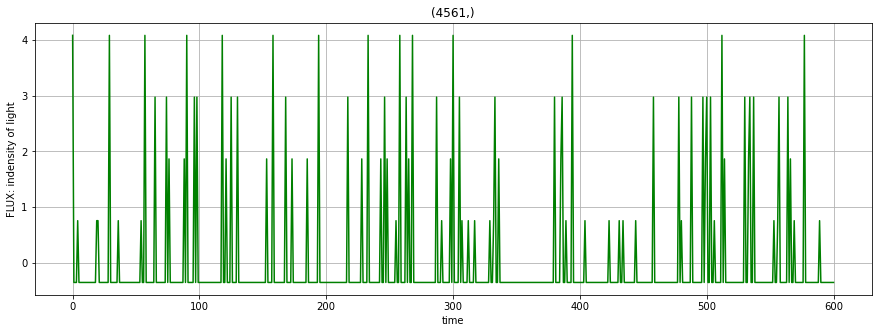

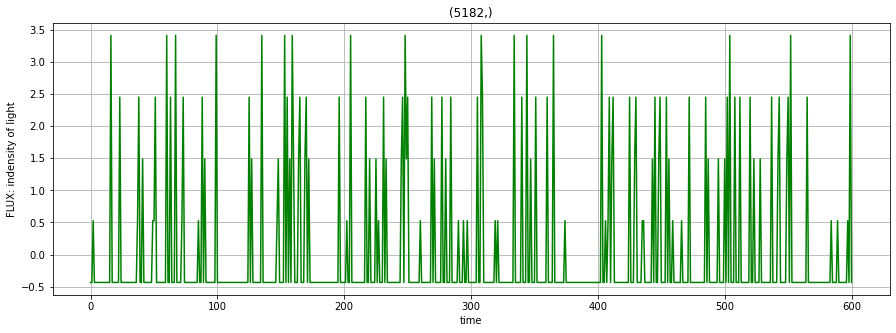

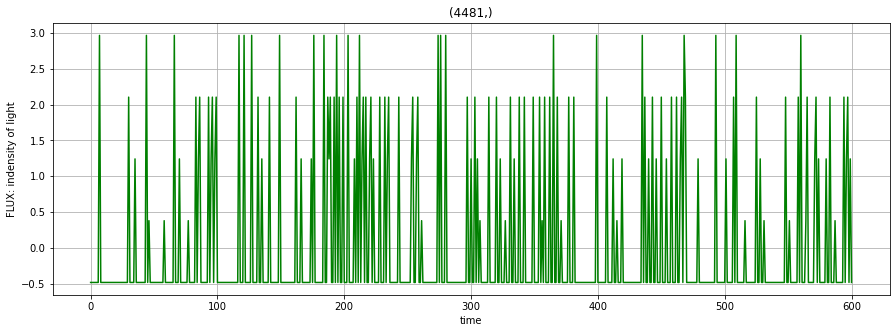

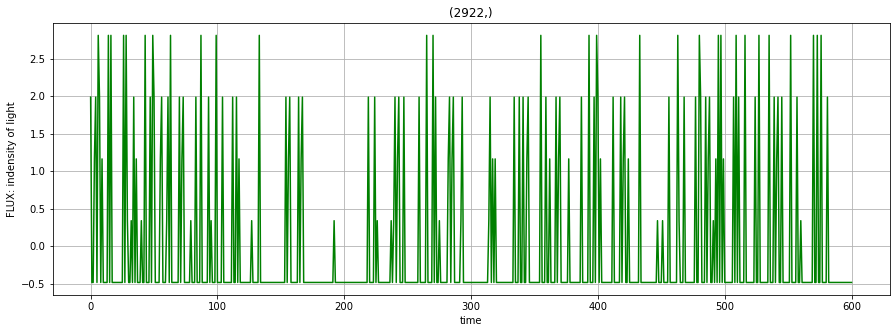

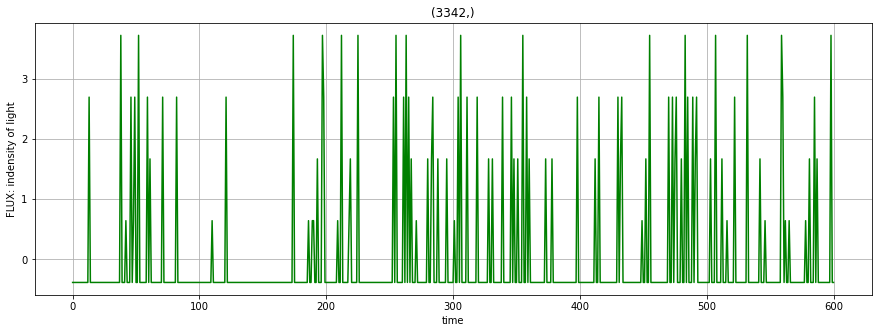

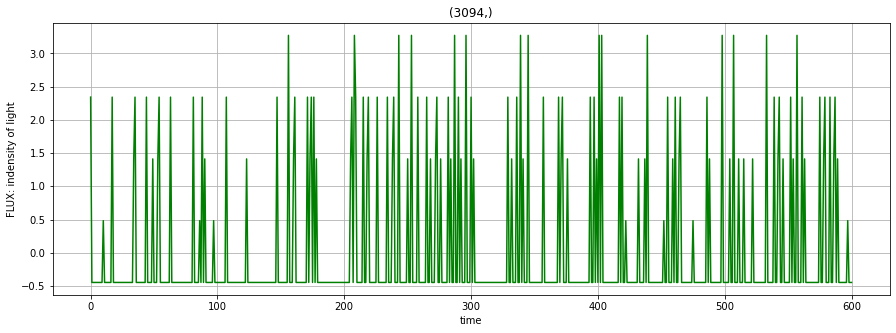

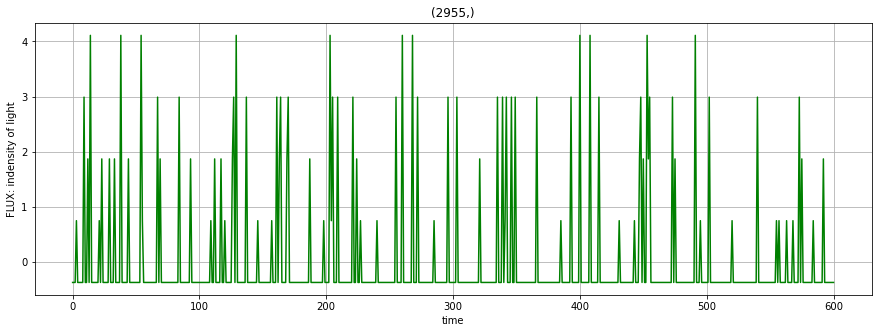

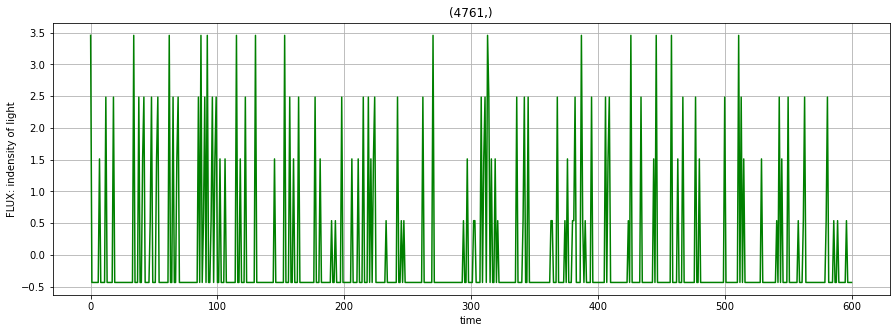

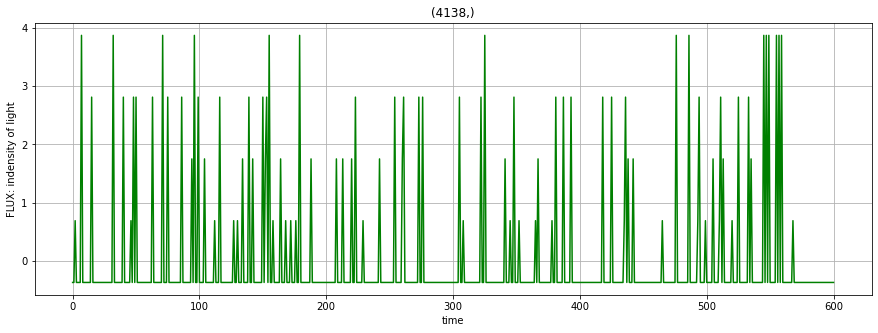

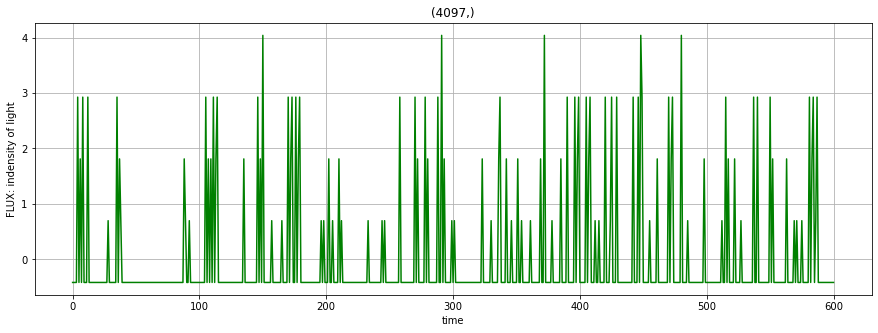

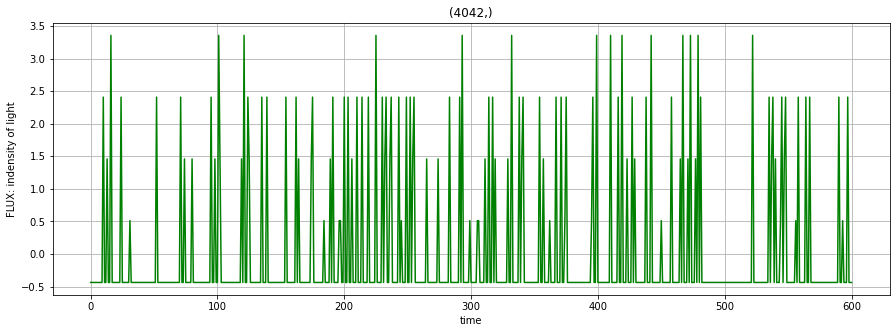

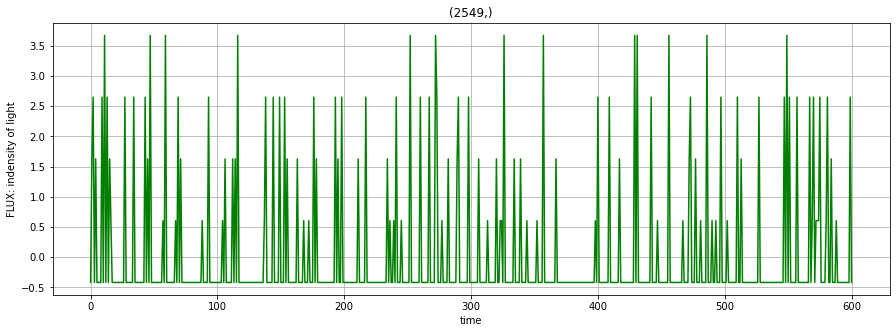

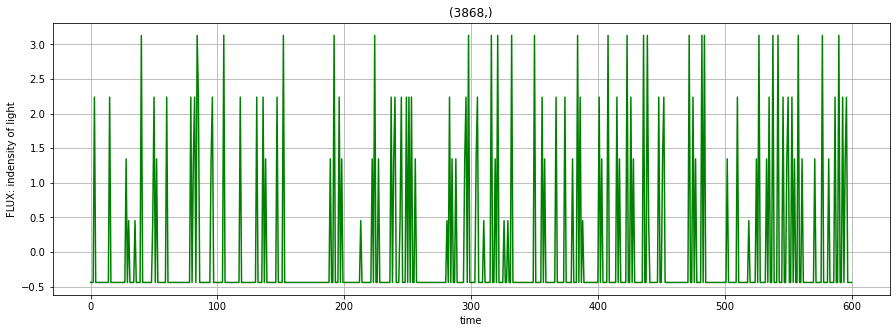

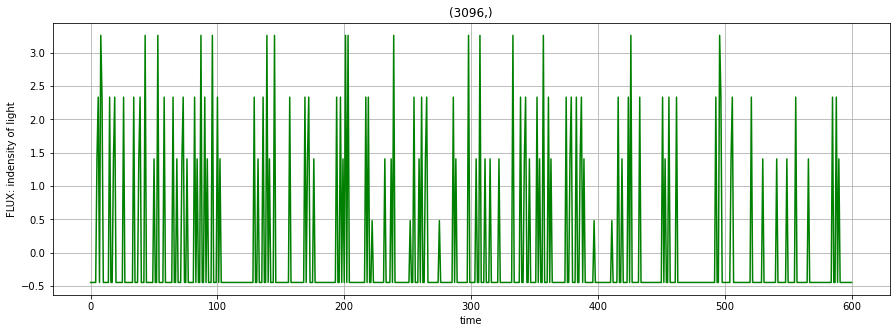

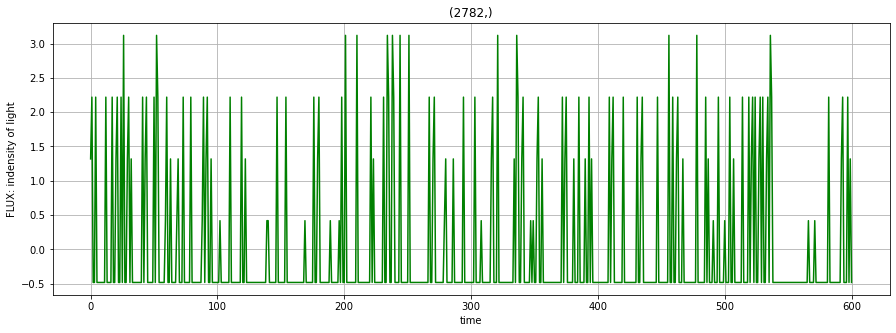

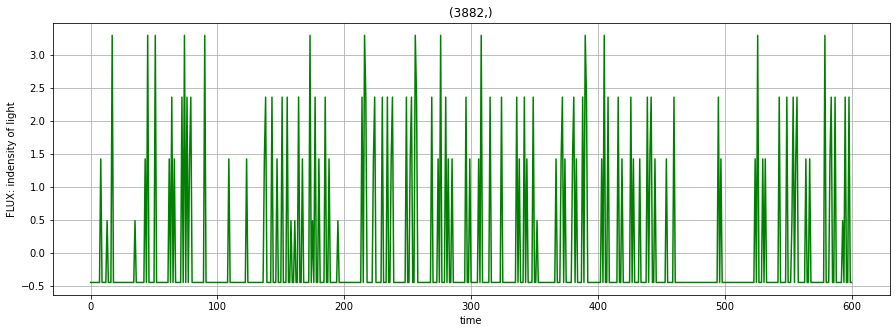

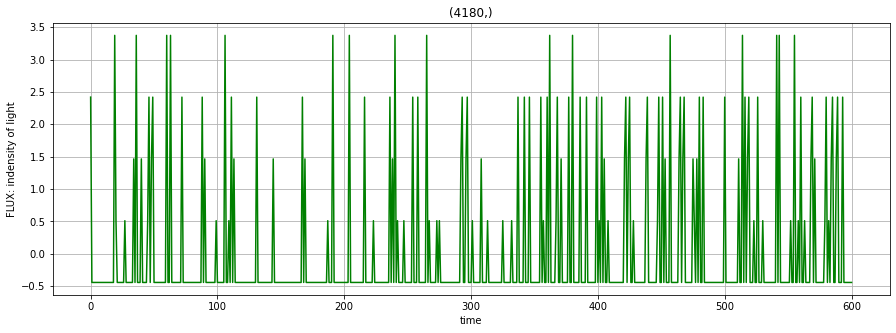

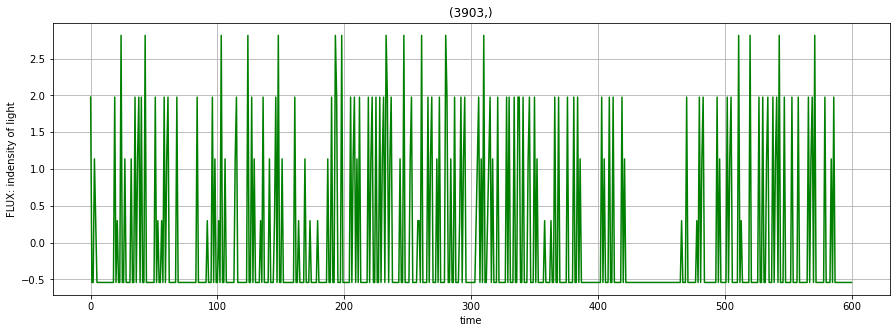

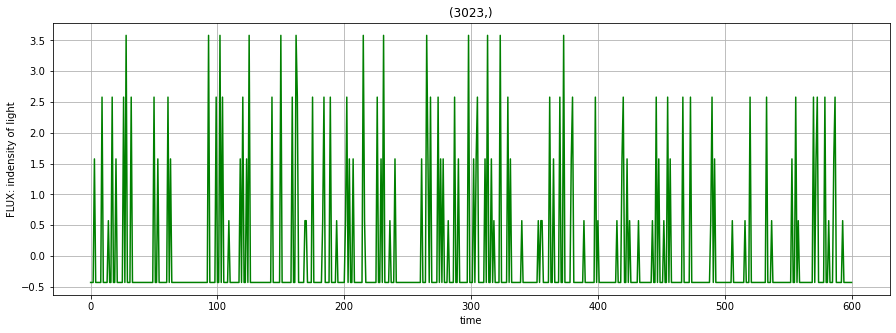

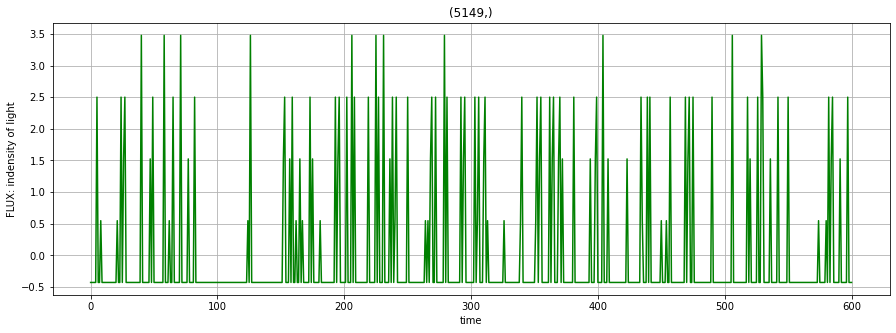

In [11]:
#standize the dataset
from sklearn.preprocessing import StandardScaler
#show data2
#randomly choose data2 sample
#randomly choose data2 sample
data2list=list(data2.index)
data2sample=random.sample(data2list,30)
data2sample=np.array(data2sample)
data2sample.shape
#len(data2sample)
#print('length of ECG data : ', len(df222))
for j in enumerate(data2sample):
    shape=data2sample.shape
    i=j[1:2] #importance! 2d array->1d array
    df2 = data2.loc[i]
    df22=df2.values
    df22.shape
    df222=df22.reshape(len(df22),-1)
    
    #normalization
    scalar= StandardScaler()
    data_stand1=scalar.fit_transform(df222)

    timeseries=np.arange(df.shape[1])

    plt.figure(figsize=(15,5))
    plt.title(i)
    plt.grid(True)
    plt.xlabel('time')
    plt.ylabel('FLUX: indensity of light')

    plt.plot(timeseries,data_stand1,color='green')


In [12]:
#read csv data as numpy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import random

from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors

In [13]:
data_copy = data.copy()
data_copy

0  1  2  3  4  5  6  7  8  9  ...  591  592  593  594  595  596  597  \
0     0  0  0  0  0  0  0  0  0  0  ...  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
1     0  0  0  0  0  0  0  0  0  0  ...  0.0  0.0  0.0  0.0  0.0  3.0  0.0   
2     0  0  0  4  3  0  0  0  3  0  ...  4.0  0.0  0.0  0.0  0.0  0.0  0.0   
3     0  0  0  0  3  0  0  2  3  0  ...  0.0  0.0  2.0  0.0  0.0  0.0  0.0   
4     2  0  0  0  0  4  0  0  0  0  ...  1.0  3.0  0.0  0.0  0.0  0.0  0.0   
...  .. .. .. .. .. .. .. .. .. ..  ...  ...  ...  ...  ...  ...  ...  ...   
5778  0  0  0  0  0  0  0  0  0  0  ...  4.0  0.0  0.0  2.0  0.0  0.0  0.0   
5779  0  3  0  4  0  0  0  0  3  0  ...  0.0  4.0  0.0  0.0  0.0  4.0  0.0   
5780  0  0  0  0  0  0  0  0  0  0  ...  3.0  0.0  2.0  0.0  0.0  2.0  0.0   
5781  0  0  0  0  0  0  2  0  0  0  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
5782  0  3  0  0  3  0  0  0  0  0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

      598  599  LABEL  
0     4.0  0.0      2  
1     0.0  0.0      2  
2     0.0  0.0      2  
3     0.0  2.0      2  
4     0.0  0.0      2  
...   ...  ...    ...  
5778  4.0  0.0      1  
5779  0.0  0.0      1  
5780  0.0  2.0      1  
5781  0.0  0.0      1  
5782  0.0  0.0      1  

[5783 rows x 601 columns]

In [14]:
df_poe = data_copy[data_copy.LABEL == 0]
df_poe

0  1  2  3  4  5  6  7  8  9  ...  591  592  593  594  595  596  597  \
2498  0  0  0  0  0  0  0  0  0  0  ...  0.0  0.0  0.0  3.0  0.0  2.0  0.0   
2499  0  0  0  0  0  0  0  0  2  3  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2500  0  0  0  0  0  0  0  0  0  0  ...  0.0  0.0  4.0  0.0  0.0  0.0  0.0   
2501  0  0  3  0  2  0  0  0  0  0  ...  3.0  0.0  0.0  0.0  4.0  0.0  0.0   
2502  3  0  2  0  0  0  0  0  0  0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...  .. .. .. .. .. .. .. .. .. ..  ...  ...  ...  ...  ...  ...  ...  ...   
5219  0  0  0  0  2  0  4  2  0  0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
5220  0  3  0  0  2  3  0  0  0  0  ...  0.0  2.0  0.0  0.0  0.0  2.0  0.0   
5221  0  0  0  0  0  0  3  0  0  0  ...  2.0  0.0  0.0  0.0  0.0  0.0  0.0   
5222  0  1  0  0  1  3  0  0  1  3  ...  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
5223  0  0  0  0  0  0  1  0  4  0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

      598  599  LABEL  
2498  0.0  0.0      0  
2499  0.0  0.0      0  
2500  2.0  3.0      0  
2501  0.0  0.0      0  
2502  4.0  0.0      0  
...   ...  ...    ...  
5219  0.0  3.0      0  
5220  0.0  0.0      0  
5221  0.0  0.0      0  
5222  0.0  3.0      0  
5223  0.0  0.0      0  

[2726 rows x 601 columns]

In [15]:
df_others = data_copy[data_copy.LABEL != 0]
df_others

0  1  2  3  4  5  6  7  8  9  ...  591  592  593  594  595  596  597  \
0     0  0  0  0  0  0  0  0  0  0  ...  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
1     0  0  0  0  0  0  0  0  0  0  ...  0.0  0.0  0.0  0.0  0.0  3.0  0.0   
2     0  0  0  4  3  0  0  0  3  0  ...  4.0  0.0  0.0  0.0  0.0  0.0  0.0   
3     0  0  0  0  3  0  0  2  3  0  ...  0.0  0.0  2.0  0.0  0.0  0.0  0.0   
4     2  0  0  0  0  4  0  0  0  0  ...  1.0  3.0  0.0  0.0  0.0  0.0  0.0   
...  .. .. .. .. .. .. .. .. .. ..  ...  ...  ...  ...  ...  ...  ...  ...   
5778  0  0  0  0  0  0  0  0  0  0  ...  4.0  0.0  0.0  2.0  0.0  0.0  0.0   
5779  0  3  0  4  0  0  0  0  3  0  ...  0.0  4.0  0.0  0.0  0.0  4.0  0.0   
5780  0  0  0  0  0  0  0  0  0  0  ...  3.0  0.0  2.0  0.0  0.0  2.0  0.0   
5781  0  0  0  0  0  0  2  0  0  0  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
5782  0  3  0  0  3  0  0  0  0  0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

      598  599  LABEL  
0     4.0  0.0      2  
1     0.0  0.0      2  
2     0.0  0.0      2  
3     0.0  2.0      2  
4     0.0  0.0      2  
...   ...  ...    ...  
5778  4.0  0.0      1  
5779  0.0  0.0      1  
5780  0.0  2.0      1  
5781  0.0  0.0      1  
5782  0.0  0.0      1  

[3057 rows x 601 columns]

In [16]:
df_poe.shape, df_others.shape

((2726, 601), (3057, 601))

In [17]:
split = 0.8
train_poe = int(df_poe.shape[0]*split)
train_others = int(df_others.shape[0]*split)

test_poe = int(df_poe.shape[0]) - int(df_poe.shape[0]*split)
test_others = int(df_others.shape[0]) - int(df_others.shape[0]*split)
print(train_poe, train_others, test_poe, test_others)

2180 2445 546 612


In [18]:
df_train_poe = df_poe.sample(n=train_poe, random_state=40)
df_train_poe

0  1  2  3  4  5  6  7  8  9  ...  591  592  593  594  595  596  597  \
3143  0  4  0  0  0  0  0  0  3  0  ...  0.0  2.0  3.0  0.0  0.0  1.0  0.0   
4687  2  0  0  4  3  0  0  2  0  0  ...  0.0  1.0  0.0  0.0  4.0  0.0  0.0   
4066  4  0  0  0  0  0  0  0  0  0  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
4886  0  0  0  0  0  0  0  0  0  0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4675  3  0  0  0  3  0  2  3  0  0  ...  0.0  0.0  3.0  4.0  0.0  0.0  0.0   
...  .. .. .. .. .. .. .. .. .. ..  ...  ...  ...  ...  ...  ...  ...  ...   
2942  0  0  0  0  0  0  0  0  0  0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3368  4  0  0  0  0  0  3  0  2  3  ...  0.0  0.0  3.0  0.0  2.0  0.0  0.0   
4645  0  0  0  0  0  0  2  1  0  0  ...  0.0  0.0  3.0  0.0  0.0  0.0  3.0   
3465  3  0  2  0  0  0  4  3  0  0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4146  0  0  0  0  0  2  3  0  0  0  ...  0.0  0.0  0.0  2.0  0.0  0.0  0.0   

      598  599  LABEL  
3143  0.0  4.0      0  
4687  0.0  0.0      0  
4066  0.0  0.0      0  
4886  0.0  0.0      0  
4675  1.0  0.0      0  
...   ...  ...    ...  
2942  0.0  0.0      0  
3368  0.0  0.0      0  
4645  0.0  0.0      0  
3465  0.0  2.0      0  
4146  0.0  0.0      0  

[2180 rows x 601 columns]

In [19]:
df_train_others = df_others.sample(n=train_others, random_state=40)
df_train_others

0  1  2  3  4  5  6  7  8  9  ...  591  592  593  594  595  596  597  \
192   0  0  0  0  0  0  0  0  0  3  ...  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
430   0  0  1  0  0  0  2  3  0  2  ...  0.0  2.0  0.0  0.0  0.0  0.0  0.0   
307   3  0  0  0  0  0  0  0  0  0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1673  0  0  3  0  0  0  0  0  0  0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1045  0  0  0  0  0  0  0  0  0  0  ...  3.0  0.0  4.0  3.0  0.0  2.0  3.0   
...  .. .. .. .. .. .. .. .. .. ..  ...  ...  ...  ...  ...  ...  ...  ...   
967   0  0  0  0  0  0  0  3  0  0  ...  0.0  3.0  0.0  2.0  3.0  0.0  0.0   
1648  0  0  0  0  0  0  0  0  0  0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2015  0  0  0  0  0  0  0  0  0  0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1040  0  0  0  0  0  0  0  2  0  3  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2061  0  0  0  0  0  0  0  0  4  0  ...  0.0  0.0  0.0  4.0  0.0  0.0  0.0   

      598  599  LABEL  
192   2.0  0.0      2  
430   0.0  0.0      2  
307   4.0  0.0      2  
1673  0.0  0.0      3  
1045  0.0  0.0      3  
...   ...  ...    ...  
967   0.0  3.0      3  
1648  0.0  0.0      3  
2015  0.0  4.0      3  
1040  4.0  0.0      3  
2061  0.0  0.0      3  

[2445 rows x 601 columns]

In [20]:
df_test_poe = df_poe.sample(n=test_poe, random_state=40)
df_test_poe

0  1  2  3  4  5  6  7  8  9  ...  591  592  593  594  595  596  597  \
3143  0  4  0  0  0  0  0  0  3  0  ...  0.0  2.0  3.0  0.0  0.0  1.0  0.0   
4687  2  0  0  4  3  0  0  2  0  0  ...  0.0  1.0  0.0  0.0  4.0  0.0  0.0   
4066  4  0  0  0  0  0  0  0  0  0  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
4886  0  0  0  0  0  0  0  0  0  0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4675  3  0  0  0  3  0  2  3  0  0  ...  0.0  0.0  3.0  4.0  0.0  0.0  0.0   
...  .. .. .. .. .. .. .. .. .. ..  ...  ...  ...  ...  ...  ...  ...  ...   
4308  0  0  0  0  0  2  0  0  0  0  ...  0.0  3.0  0.0  0.0  0.0  0.0  0.0   
3308  0  0  0  0  0  0  0  0  0  0  ...  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
3325  0  0  0  0  0  3  0  0  0  0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3645  0  0  0  0  0  0  0  0  1  0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4913  0  0  1  0  0  0  0  0  4  1  ...  1.0  0.0  0.0  0.0  0.0  3.0  0.0   

      598  599  LABEL  
3143  0.0  4.0      0  
4687  0.0  0.0      0  
4066  0.0  0.0      0  
4886  0.0  0.0      0  
4675  1.0  0.0      0  
...   ...  ...    ...  
4308  0.0  0.0      0  
3308  3.0  0.0      0  
3325  0.0  0.0      0  
3645  0.0  0.0      0  
4913  0.0  0.0      0  

[546 rows x 601 columns]

In [21]:
df_test_others = df_others.sample(n=test_others, random_state=40)
df_test_others

0  1  2  3  4  5  6  7  8  9  ...  591  592  593  594  595  596  597  \
192   0  0  0  0  0  0  0  0  0  3  ...  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
430   0  0  1  0  0  0  2  3  0  2  ...  0.0  2.0  0.0  0.0  0.0  0.0  0.0   
307   3  0  0  0  0  0  0  0  0  0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1673  0  0  3  0  0  0  0  0  0  0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1045  0  0  0  0  0  0  0  0  0  0  ...  3.0  0.0  4.0  3.0  0.0  2.0  3.0   
...  .. .. .. .. .. .. .. .. .. ..  ...  ...  ...  ...  ...  ...  ...  ...   
5426  1  0  0  0  0  0  0  0  0  0  ...  0.0  0.0  0.0  0.0  0.0  0.0  3.0   
1050  0  0  0  0  0  0  0  0  0  0  ...  2.0  0.0  0.0  0.0  0.0  0.0  0.0   
70    0  0  3  0  2  3  0  0  0  0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
7     0  0  0  0  4  0  0  0  0  0  ...  0.0  0.0  0.0  0.0  3.0  0.0  0.0   
5397  0  0  0  0  0  0  0  4  0  0  ...  0.0  0.0  0.0  0.0  2.0  3.0  0.0   

      598  599  LABEL  
192   2.0  0.0      2  
430   0.0  0.0      2  
307   4.0  0.0      2  
1673  0.0  0.0      3  
1045  0.0  0.0      3  
...   ...  ...    ...  
5426  0.0  0.0      1  
1050  0.0  0.0      3  
70    0.0  2.0      2  
7     1.0  0.0      2  
5397  0.0  4.0      1  

[612 rows x 601 columns]

In [22]:
df_train = pd.concat([df_train_poe, df_train_others], axis = 0)
df_train.insert(0, 'LABEL2', 'value')
df_train.LABEL2 = df_train.LABEL
df_train = df_train.drop('LABEL', axis = 1)
#df_train.rename(columns={'LABEL2': 'LABEL'}
#df_train.rename(columns={'LABEL2': 'LABEL'})
df_train.reset_index(drop = True, inplace = True)
df_train = df_train.rename(columns = {'LABEL2':'LABEL'})
df_train = df_train.set_index('LABEL')
df_train


0  1  2  3  4  5  6  7  8  9  ...  590  591  592  593  594  595  596  \
LABEL                                ...                                      
0      0  4  0  0  0  0  0  0  3  0  ...  0.0  0.0  2.0  3.0  0.0  0.0  1.0   
0      2  0  0  4  3  0  0  2  0  0  ...  0.0  0.0  1.0  0.0  0.0  4.0  0.0   
0      4  0  0  0  0  0  0  0  0  0  ...  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
0      0  0  0  0  0  0  0  0  0  0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
0      3  0  0  0  3  0  2  3  0  0  ...  0.0  0.0  0.0  3.0  4.0  0.0  0.0   
...   .. .. .. .. .. .. .. .. .. ..  ...  ...  ...  ...  ...  ...  ...  ...   
3      0  0  0  0  0  0  0  3  0  0  ...  0.0  0.0  3.0  0.0  2.0  3.0  0.0   
3      0  0  0  0  0  0  0  0  0  0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3      0  0  0  0  0  0  0  0  0  0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3      0  0  0  0  0  0  0  2  0  3  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3      0  0  0  0  0  0  0  0  4  0  ...  0.0  0.0  0.0  0.0  4.0  0.0  0.0   

       597  598  599  
LABEL                 
0      0.0  0.0  4.0  
0      0.0  0.0  0.0  
0      0.0  0.0  0.0  
0      0.0  0.0  0.0  
0      0.0  1.0  0.0  
...    ...  ...  ...  
3      0.0  0.0  3.0  
3      0.0  0.0  0.0  
3      0.0  0.0  4.0  
3      0.0  4.0  0.0  
3      0.0  0.0  0.0  

[4625 rows x 600 columns]

In [23]:
df_test = pd.concat([df_test_poe, df_test_others], axis = 0)
df_test.insert(0, 'LABEL2', 'value')
df_test.LABEL2 = df_test.LABEL
df_test = df_test.drop('LABEL', axis = 1)
#df_test.rename(columns={'LABEL2': 'LABEL'}
#df_test.rename(columns={'LABEL2': 'LABEL'})
df_test.reset_index(drop = True, inplace = True)
df_test = df_test.rename(columns = {'LABEL2':'LABEL'})
df_test = df_test.set_index('LABEL')
df_test

0  1  2  3  4  5  6  7  8  9  ...  590  591  592  593  594  595  596  \
LABEL                                ...                                      
0      0  4  0  0  0  0  0  0  3  0  ...  0.0  0.0  2.0  3.0  0.0  0.0  1.0   
0      2  0  0  4  3  0  0  2  0  0  ...  0.0  0.0  1.0  0.0  0.0  4.0  0.0   
0      4  0  0  0  0  0  0  0  0  0  ...  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
0      0  0  0  0  0  0  0  0  0  0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
0      3  0  0  0  3  0  2  3  0  0  ...  0.0  0.0  0.0  3.0  4.0  0.0  0.0   
...   .. .. .. .. .. .. .. .. .. ..  ...  ...  ...  ...  ...  ...  ...  ...   
1      1  0  0  0  0  0  0  0  0  0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3      0  0  0  0  0  0  0  0  0  0  ...  0.0  2.0  0.0  0.0  0.0  0.0  0.0   
2      0  0  3  0  2  3  0  0  0  0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2      0  0  0  0  4  0  0  0  0  0  ...  0.0  0.0  0.0  0.0  0.0  3.0  0.0   
1      0  0  0  0  0  0  0  4  0  0  ...  0.0  0.0  0.0  0.0  0.0  2.0  3.0   

       597  598  599  
LABEL                 
0      0.0  0.0  4.0  
0      0.0  0.0  0.0  
0      0.0  0.0  0.0  
0      0.0  0.0  0.0  
0      0.0  1.0  0.0  
...    ...  ...  ...  
1      3.0  0.0  0.0  
3      0.0  0.0  0.0  
2      0.0  0.0  2.0  
2      0.0  1.0  0.0  
1      0.0  0.0  4.0  

[1158 rows x 600 columns]

In [24]:
#preserve the timeseries dataset
def my_makedirs(path):
    if not os.path.isdir(path):
        os.makedirs(path)
        
path_time_series_merged = './time_series_csv/'
my_makedirs(path_time_series_merged)

df_train.to_csv(path_time_series_merged + '/' + 'train.csv')
df_test.to_csv(path_time_series_merged + '/' + 'test.csv')

In [25]:
path = Path(r'C:\Users\Si\Desktop\python_all\Python ML\C44TimeSeriesofStarFlux\time_series_csv')
list(path.glob('*.csv'))

[WindowsPath('C:/Users/Si/Desktop/python_all/Python ML/C44TimeSeriesofStarFlux/time_series_csv/test.csv'),
 WindowsPath('C:/Users/Si/Desktop/python_all/Python ML/C44TimeSeriesofStarFlux/time_series_csv/train.csv')]

In [26]:
#read csv data as numpy
from scipy.ndimage.filters import uniform_filter1d
#D:\datasets\exoplanets

#path = Path(r'C:\Users\Si\Desktop\python_all\Python ML\C44TimeSeriesofStarFlux\datasets')
INPUT_LIB = list(path.glob('*.csv'))[1]

INPUT_LIB2 = list(path.glob('*.csv'))[0]
raw_data = np.loadtxt(INPUT_LIB , skiprows=1, delimiter=',')
x_train = raw_data[:, 1:]
y_train = raw_data[:, 0, np.newaxis]
raw_data2 = np.loadtxt(INPUT_LIB2 , skiprows=1, delimiter=',')
x_test = raw_data2[:, 1:]
y_test = raw_data2[:, 0, np.newaxis]

x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_train

((4625, 600),
 (4625, 1),
 (1158, 600),
 (1158, 1),
 array([[0., 4., 0., ..., 0., 0., 4.],
        [2., 0., 0., ..., 0., 0., 0.],
        [4., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 4.],
        [0., 0., 0., ..., 0., 4., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

In [27]:
y_train

array([[0.],
       [0.],
       [0.],
       ...,
       [3.],
       [3.],
       [3.]])

In [28]:
#read csv data as numpy
from scipy.ndimage.filters import uniform_filter1d
#D:\datasets\exoplanets

#path = Path(r'C:\Users\Si\Desktop\python_all\Python ML\C44TimeSeriesofStarFlux\datasets')
INPUT_LIB = list(path.glob('*.csv'))[1]

INPUT_LIB2 = list(path.glob('*.csv'))[0]
raw_data = np.loadtxt(INPUT_LIB , skiprows=1, delimiter=',')
x_train = raw_data[:, 1:]
y_train = raw_data[:, 0, np.newaxis]
raw_data2 = np.loadtxt(INPUT_LIB2 , skiprows=1, delimiter=',')
x_test = raw_data2[:, 1:]
y_test = raw_data2[:, 0, np.newaxis]

x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_train


#std
x_train = ((x_train - np.mean(x_train, axis=1).reshape(-1,1)) / 
           np.std(x_train, axis=1).reshape(-1,1))
x_test = ((x_test - np.mean(x_test, axis=1).reshape(-1,1)) / 
          np.std(x_test, axis=1).reshape(-1,1))

#split training data 
#X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, stratify=y_train, test_size=0.3, random_state=123)
#x_train = np.stack([x_train, uniform_filter1d(x_train, axis=1, size=200)], axis=2) #(5087, 3197, 2)
#reshape data for deeplearning
#np.set_printoptions(threshold=np.inf)
#X_train_r = np.expand_dims(X_train, axis=2) #(3560, 3197)->(3560, 3197, 1)
X_train_r = np.expand_dims(x_train, axis=2) #(3560, 3197)->(3560, 3197, 1)
x_test_r = np.expand_dims(x_test, axis=2)

#X_val_r = np.expand_dims(X_val, axis=2)
#x_test = np.expand_dims(x_test, axis=2)

#x_train, x_test, y_train, y_test, x_train.shape, x_test.shape, y_train.shape, y_test.shape
#raw_data.shape,x_train.shape, x_test.shape, y_train.shape, y_test.shape,  raw_data, y_train
#raw_data.shape,X_train.shape, x_test.shape, y_train.shape, y_test.shape,  raw_data, y_train
#X_train_r.shape, X_train.shape, X_train_r, X_train
x_train.shape, X_train_r.shape, x_test_r.shape, x_test.shape, X_train_r

C:\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
C:\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


((4625, 600),
 (4625, 600, 1),
 (1158, 600, 1),
 (1158, 600),
 array([[[-0.44906605],
         [ 3.2545715 ],
         [-0.44906605],
         ...,
         [-0.44906605],
         [-0.44906605],
         [ 3.2545715 ]],
 
        [[ 1.75001474],
         [-0.38849615],
         [-0.38849615],
         ...,
         [-0.38849615],
         [-0.38849615],
         [-0.38849615]],
 
        [[ 2.85871058],
         [-0.50118432],
         [-0.50118432],
         ...,
         [-0.50118432],
         [-0.50118432],
         [-0.50118432]],
 
        ...,
 
        [[-0.35493448],
         [-0.35493448],
         [-0.35493448],
         ...,
         [-0.35493448],
         [-0.35493448],
         [ 3.94730161]],
 
        [[-0.36544928],
         [-0.36544928],
         [-0.36544928],
         ...,
         [-0.36544928],
         [ 3.69509824],
         [-0.36544928]],
 
        [[-0.40413351],
         [-0.40413351],
         [-0.40413351],
         ...,
         [-0.40413351],
        

In [29]:
X_train_r[0].shape, X_train_r[0]

((600, 1),
 array([[-0.44906605],
        [ 3.2545715 ],
        [-0.44906605],
        [-0.44906605],
        [-0.44906605],
        [-0.44906605],
        [-0.44906605],
        [-0.44906605],
        [ 2.32866211],
        [-0.44906605],
        [-0.44906605],
        [-0.44906605],
        [-0.44906605],
        [ 1.40275272],
        [ 2.32866211],
        [-0.44906605],
        [-0.44906605],
        [-0.44906605],
        [-0.44906605],
        [-0.44906605],
        [ 0.47684333],
        [ 2.32866211],
        [-0.44906605],
        [-0.44906605],
        [ 1.40275272],
        [ 2.32866211],
        [-0.44906605],
        [-0.44906605],
        [-0.44906605],
        [ 2.32866211],
        [-0.44906605],
        [-0.44906605],
        [-0.44906605],
        [-0.44906605],
        [-0.44906605],
        [-0.44906605],
        [-0.44906605],
        [-0.44906605],
        [ 2.32866211],
        [-0.44906605],
        [-0.44906605],
        [-0.44906605],
        [-0.44906605],


In [30]:
#batch_generator

def batch_generator(x_train, y_train, batch_size):
    """
    Gives equal number of positive and negative samples, and rotates them randomly in time
    """
    half_batch = batch_size // 2
    x_batch = np.empty((batch_size, x_train.shape[1], x_train.shape[2]), dtype='float32')
    y_batch = np.empty((batch_size, y_train.shape[1]), dtype='float32')
    
    yes_idx = np.where(y_train[:,0] == 1.)[0]
    non_idx = np.where(y_train[:,0] == 0.)[0]
    
    while True:
        np.random.shuffle(yes_idx)
        np.random.shuffle(non_idx)
    
        x_batch[:half_batch] = x_train[yes_idx[:half_batch]]
        x_batch[half_batch:] = x_train[non_idx[half_batch:batch_size]]
        
        y_batch[:half_batch] = y_train[yes_idx[:half_batch]]
        y_batch[half_batch:] = y_train[non_idx[half_batch:batch_size]]
    
        #for i in range(batch_size):
            #sz = np.random.randint(x_batch.shape[1])
            #x_batch[i] = np.roll(x_batch[i], sz, axis = 0)
        #print(x_batch, y_batch)
        yield x_batch, y_batch
        
print('====>batch_generator initiated!')

====>batch_generator initiated!


In [31]:
cc

NameError: name 'cc' is not defined

# strategy01: simple CNN

In [ ]:
#CNN NEURAL NETWORK
#Keras is a high level neural networks library, based on either tensorflow or theano
from keras.models import Sequential, Model
from keras.layers import Conv1D, MaxPool1D, Dense, Dropout, Flatten, \
BatchNormalization, Input, concatenate, Activation
from keras.optimizers import Adam

model = Sequential()
model.add(Conv1D(filters=8, kernel_size=11, activation='relu', input_shape=X_train_r.shape[1:]))
model.add(MaxPool1D(strides=4))
model.add(BatchNormalization())
model.add(Conv1D(filters=16, kernel_size=11, activation='relu'))
model.add(MaxPool1D(strides=4))
model.add(BatchNormalization())
model.add(Conv1D(filters=32, kernel_size=11, activation='relu'))
model.add(MaxPool1D(strides=4))
model.add(BatchNormalization())
model.add(Conv1D(filters=64, kernel_size=11, activation='relu'))
model.add(MaxPool1D(strides=4))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

In [ ]:
#Start with a slightly lower learning rate, to ensure convergence
epochs=50
model.compile(optimizer=Adam(4e-5), loss = 'binary_crossentropy', metrics=['accuracy'])

hist = model.fit_generator(batch_generator(X_train_r, y_train, 5), 
                           validation_data=(x_test_r, y_test), 
                           verbose=1, epochs=epochs,
                           steps_per_epoch=x_train.shape[1]//32)

In [ ]:
#visualization
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']

epochs=50

# プロット図のサイズを設定
xsize=10
ysize=6

plt.ﬁgure(ﬁgsize=(xsize, ysize))
# プロット図の間のスペースを空ける  plt.subplots_adjust(wspace=0.4, hspace=0.6)
#plt.subplots_adjust(wspace=0.2)

# 1×2のグリッドの左(1,2,1)の領域にプロット
#plt.subplot(1, 2, 1)
# 訓練データの損失(誤り率)をプロット
plt.plot(range(epochs),
         hist.history['loss'],
         label='training',
         color='black')
# テストデータの損失(誤り率)をプロット
plt.plot(range(epochs),
         hist.history['val_loss'],
         label='test',
         color='red')
#plt.ylim(0, 1)       # y軸の範囲
plt.legend()         # 凡例を表示 
#plt.grid()           # グリッド表示
plt.xlabel('epoch')  # x軸ラベル
plt.ylabel('loss')   # y軸ラベル
plt.show()

# 1×2のグリッドの右(1,2,2)の領域にプロット
plt.ﬁgure(ﬁgsize=(xsize, ysize))

#plt.subplot(1, 2, 2)
# 訓練データの正解率をプロット
plt.plot(range(epochs),
         hist.history['accuracy'],
         label='training',
         color='black')
# テストデータの正解率をプロット
plt.plot(range(epochs),
         hist.history['val_accuracy'],
         label='test',
         color='red')
#plt.ylim(0.5, 1)     # y軸の範囲
plt.legend()         # 凡例を表示
#plt.grid()           # グリッド表示
plt.xlabel('epoch')  # x軸ラベル
plt.ylabel('accuracy')    # y軸ラベル
plt.show() #show graph
'''
予測精度の評価
'''

#print("val_loss:", val_loss[epochs-1],  "val_acc:", val_acc[epochs-1])
#print('loss =%.2f: acc=%.2f:' % (loss[epochs-1], acc[epochs-1]))
print('val_loss =%.2f: val_acc=%.2f:' % (val_loss[epochs-1], val_acc[epochs-1]))


# strategy02: LSTM

In [ ]:
#LSTM
import keras
from keras import layers
from keras.models import Model
from keras.layers import Input, Dense, LSTM, concatenate, Activation, CuDNNLSTM, MaxPool1D, Flatten
from keras.layers import Conv1D, BatchNormalization, GlobalAveragePooling1D, Permute, Dropout, Bidirectional
from keras.optimizers import Adam

In [ ]:
input_size = df.shape[1] -1
input_size

In [ ]:
#LSTM
ip = Input(shape=(input_size, 1))
x = Permute((2, 1))(ip)
x = LSTM(16, activation='tanh', recurrent_activation='hard_sigmoid', use_bias=True, return_sequences=True)(x)
x = LSTM(32, return_sequences=True)(x)
x = LSTM(64, return_sequences=True)(x)
x = LSTM(128)(x)
x = Dropout(0.25)(x)
print('====>LSTM imported')

In [ ]:
#CNN
#ip = Input(shape=(3197, 1))
#y = Permute((2, 1))(ip)

y = Conv1D(filters=16, kernel_size=11, activation='relu')(ip)
y = MaxPool1D(strides=4)(y)
y = BatchNormalization()(y)
y = Conv1D(filters=32, kernel_size=11, activation='relu')(y)
y = MaxPool1D(strides=4)(y)
y = BatchNormalization()(y)
y = Conv1D(filters=64, kernel_size=11, activation='relu')(y)
y = MaxPool1D(strides=4)(y)
y = BatchNormalization()(y)

#y = Conv1D(filters=128, kernel_size=11, activation='relu')(y)
#y = MaxPool1D(strides=4)(y)

y = Flatten()(y)
y = Dropout(0.25)(y)
y = Dense(64, activation='relu')(y)
print('====>CNN imported')

# Only train LSTM model

In [ ]:
#lstm
#x = concatenate([x, y])
#x = Dense(32, activation='relu')(x)
out = Dense(1, activation='sigmoid')(x)
lstm_model = Model(ip, out)
lstm_model.summary()

In [ ]:
#Only train LSTM model
epochs=50
#compile
lstm_model.compile(optimizer=Adam(4e-5), loss='binary_crossentropy', metrics=['accuracy'])
# tensorboard
tb_cb = keras.callbacks.TensorBoard(log_dir="tfloglstm/", histogram_freq=1)
cbks = [tb_cb]
#fit the model
hist_lstm=lstm_model.fit_generator(batch_generator(X_train_r, y_train, 5), 
                           validation_data=(x_test_r, y_test), callbacks = cbks,
                           verbose=1, epochs=epochs,
                           steps_per_epoch=X_train_r.shape[1]//32)
# 予測
predicted = lstm_model.predict(x_test_r)

In [ ]:
# 予測
predicted = lstm_model.predict(x_test_r)[:,0]
predicted.shape,predicted

# Only train CNN model

In [ ]:
#cnn
#x = concatenate([x, y])
#x = Dense(32, activation='relu')(x)
out = Dense(1, activation='sigmoid')(y)
cnn_model = Model(ip, out)
cnn_model.summary()

In [ ]:
#### Only train CNN model
epochs=50
#compile
cnn_model.compile(optimizer=Adam(4e-5), loss='binary_crossentropy', metrics=['accuracy'])
# tensorboard
tb_cb = keras.callbacks.TensorBoard(log_dir="tflogCNN/", histogram_freq=1)
cbks = [tb_cb]
#fit the model
histtest=cnn_model.fit_generator(batch_generator(X_train_r, y_train, 5), 
                           validation_data=(x_test_r, y_test), callbacks = cbks,
                           verbose=1, epochs=epochs,
                           steps_per_epoch=X_train_r.shape[1]//32)

# Concatenate lstm and cnn

In [ ]:
#train combined model run epochs=50 times!!
#Concatenate lstm and cnn
x = concatenate([x, y])
x = Dense(32, activation='relu')(x) #x=dropout x=concatenate 両方実装される？
#x = concatenate([x, y])
#x = Dense(32, activation='relu')(x)
out = Dense(1, activation = 'sigmoid')(x)
lstm_cnn_model = Model(ip, out)
lstm_cnn_model.summary()

batch_size = 10
epochs=50
weight_dir = './weights'
my_makedirs(weight_dir)
cp_cb = ModelCheckpoint(filepath = weight_dir +'/'+'LSTM_CNN.h5', verbose=1, save_best_only=True)

lstm_cnn_model.compile(optimizer=Adam(4e-4), loss='binary_crossentropy', metrics=['accuracy'])

hist=lstm_cnn_model.fit_generator(batch_generator(X_train_r, y_train, batch_size), 
                           validation_data=(x_test_r, y_test), 
                           verbose=1, epochs=epochs,
                           steps_per_epoch=X_train_r.shape[1]//batch_size, callbacks=[cp_cb])





In [ ]:
#visualization
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']

epochs=50

# プロット図のサイズを設定
xsize=10
ysize=6

plt.ﬁgure(ﬁgsize=(xsize, ysize))
# プロット図の間のスペースを空ける  plt.subplots_adjust(wspace=0.4, hspace=0.6)
#plt.subplots_adjust(wspace=0.2)

# 1×2のグリッドの左(1,2,1)の領域にプロット
#plt.subplot(1, 2, 1)
# 訓練データの損失(誤り率)をプロット
plt.plot(range(epochs),
         hist.history['loss'],
         label='training',
         color='black')
# テストデータの損失(誤り率)をプロット
plt.plot(range(epochs),
         hist.history['val_loss'],
         label='test',
         color='red')
#plt.ylim(0, 1)       # y軸の範囲
plt.legend()         # 凡例を表示 
#plt.grid()           # グリッド表示
plt.xlabel('epoch')  # x軸ラベル
plt.ylabel('loss')   # y軸ラベル
plt.show()

# 1×2のグリッドの右(1,2,2)の領域にプロット
plt.ﬁgure(ﬁgsize=(xsize, ysize))

#plt.subplot(1, 2, 2)
# 訓練データの正解率をプロット
plt.plot(range(epochs),
         hist.history['accuracy'],
         label='training',
         color='black')
# テストデータの正解率をプロット
plt.plot(range(epochs),
         hist.history['val_accuracy'],
         label='test',
         color='red')
#plt.ylim(0.5, 1)     # y軸の範囲
plt.legend()         # 凡例を表示
#plt.grid()           # グリッド表示
plt.xlabel('epoch')  # x軸ラベル
plt.ylabel('accuracy')    # y軸ラベル
plt.show() #show graph
'''
予測精度の評価
'''

#print("val_loss:", val_loss[epochs-1],  "val_acc:", val_acc[epochs-1])
#print('loss =%.2f: acc=%.2f:' % (loss[epochs-1], acc[epochs-1]))
print('val_loss =%.2f: val_acc=%.2f:' % (val_loss[epochs-1], val_acc[epochs-1]))


In [ ]:
X_train_r.shape[0], x_test_r.shape[0]

In [ ]:
#output abonormal data prediction
# test sample prediction
for i in range(x_test_r.shape[0]):
    pred = lstm_cnn_model.predict(x_test_r)[:,0]
    label= y_test[:,0]
    pred.shape
    
    if label[i]==1:
        diff=abs(pred[i]-label[i])
        print('True_Label:',label[i], 'Test Sample No.',i,'pred=:', pred[i],'diff_value:', diff)
        if diff>0.5:
            print('possible_wrong_labels')
            print('True_Label:',label[i], 'Test Sample No.',i,'prediction incorrect!','pred=:', pred[i],'Label:',label[i],'diff_value:', diff)
        
    elif label[i] !=1:
        diff=abs(pred[i]-label[i])
        print('True_Label:',label[i], 'Test Sample No.',i,'pred=:', pred[i],'diff_value:', diff)
        if diff>0.5:
            print('possible_correct_labels')
            print('True_Label:',label[i], 'Test Sample No.',i,'prediction incorrect!','pred=:', pred[i],'Label:',label[i],'diff_value:', diff)
print('test sample prediction complete')
   


In [ ]:
# train sample prediction
for i in range(X_train_r.shape[0]):
    pred = lstm_cnn_model.predict(X_train_r)[:,0]
    label= y_train[:,0]
    pred.shape
    if label[i]==1:
        diff=abs(pred[i]-label[i])
        print('True_Label:',label[i], 'Test Sample No.',i,'pred=:', pred[i],'diff_value:', diff)
        if diff>0.5:
            print('possible_wrong_labels')
            print('True_Label:',label[i], 'Test Sample No.',i,'prediction incorrect!','pred=:', pred[i],'Label:',label[i],'diff_value:', diff)
        
    elif label[i] !=1:
        diff=abs(pred[i]-label[i])
        print('True_Label:',label[i], 'Test Sample No.',i,'pred=:', pred[i],'diff_value:', diff)
        if diff>0.5:
            print('possible_correct_labels')
            print('True_Label:',label[i], 'Test Sample No.',i,'prediction incorrect!','pred=:', pred[i],'Label:',label[i],'diff_value:', diff)
print('train sample prediction complete')

In [ ]:
cc

In [ ]:
##Appendix： excercises and expreiments in order to build the sequence!

In [ ]:
#how to build batch_data generator
batch_size = 32
for epoch in range(0,x_train.shape[0]//batch_size):
#batch_size = 32
    half_batch = batch_size // 2
    x_batch = np.empty((batch_size, x_train.shape[1]), dtype='float32') #(32, 3197)
    y_batch = np.empty((batch_size, y_train.shape[1]), dtype='float32') #(32, 1)
    
    yes_idx = np.where(y_train[:,0] == 1.)[0]
    non_idx = np.where(y_train[:,0] == 0.)[0]

    np.random.shuffle(yes_idx)
    np.random.shuffle(non_idx)

    x_batch[:half_batch] = x_train[yes_idx[:half_batch]]
    x_batch[half_batch:] = x_train[non_idx[half_batch:batch_size]]

    y_batch[:half_batch] = y_train[yes_idx[:half_batch]]
    y_batch[half_batch:] = y_train[non_idx[half_batch:batch_size]]

    for i in range(batch_size):
        sz = np.random.randint(x_batch.shape[1])
        x_batch[i] = np.roll(x_batch[i], sz, axis = 0)
        #print(x_batch[i].shape)
#print(sz, x_batch.shape[1])
#print(x_train)
    
#x_batch,x_batch.shape, x_batch[:half_batch], x_batch[:half_batch].shape,x_train[yes_idx[:half_batch]], x_train[yes_idx[:half_batch]].shape
#x_batch.shape,  x_batch[:half_batch].shape, x_train[yes_idx[:half_batch]].shape
x_batch.shape,  x_batch[half_batch:].shape, x_train[non_idx[half_batch:batch_size]].shape
#y_batch.shape,  y_batch[half_batch:].shape, y_train[non_idx[half_batch:batch_size]].shape

#x_batch, x_batch[:half_batch] , x_train[yes_idx[:half_batch]]

#x_batch, y_batch, 
#x_batch.shape, y_batch.shape ,yes,no
#yes_idx, half_batch ,yes
#yes_idx
non_idx

In [ ]:
x_train, y_train, x_train.shape, y_train.shape

In [ ]:
z = np.array([[1, 2, 3, 4],
         [5, 6, 7, 8],
         [9, 10, 11, 12]])
z[:1],z[:,1],z[1,:],z[:,0]

In [ ]:
import numpy as np

a= np.arange(12).reshape(3, 4)
print(a)
a_roll = np.roll(a, 1, axis = 0)
print(a_roll)

In [ ]:
#batch_generator

def batch_generator(x_train, y_train, batch_size=32):
    """
    Gives equal number of positive and negative samples, and rotates them randomly in time
    """
    half_batch = batch_size // 2
    x_batch = np.empty((batch_size, x_train.shape[1], x_train.shape[2]), dtype='float32')
    y_batch = np.empty((batch_size, y_train.shape[1]), dtype='float32')
    
    yes_idx = np.where(y_train[:,0] == 1.)[0]
    non_idx = np.where(y_train[:,0] == 0.)[0]
    
    while True:
        np.random.shuffle(yes_idx)
        np.random.shuffle(non_idx)
    
        x_batch[:half_batch] = x_train[yes_idx[:half_batch]]
        x_batch[half_batch:] = x_train[non_idx[half_batch:batch_size]]
        y_batch[:half_batch] = y_train[yes_idx[:half_batch]]
        y_batch[half_batch:] = y_train[non_idx[half_batch:batch_size]]
    
        for i in range(batch_size):
            sz = np.random.randint(x_batch.shape[1])
            x_batch[i] = np.roll(x_batch[i], sz, axis = 0) #
        #print(x_batch, y_batch)
        yield x_batch, y_batch

In [ ]:
a = np.array([1,2,3])
for idx in enumerate(a):
   print("{0}".format(idx))

In [ ]:
#randomly choose data1 sample
data1list=list(data1.index)
data1sample=random.sample(data1list,30)
data1sample=np.array(data1sample)
data1sample
#len(data1sample)
#print('length of ECG data : ', len(df222))
for i in enumerate(data1sample):
    j=data1sample[1:2]
       
    print(j)
data1sample=data1sample

In [ ]:
data1list=list(data1.index)
#ERROR data1list.shape
data1sample=np.array(data1sample)
data1sample, data1sample.shape, data1sample.tolist()

In [ ]:
#preprocessing
df2 = data.loc[2]
df1 = data.loc[5000]
df1.head(),df2.head()

df22=df2.values
#df222=df22.reshape(len(df22),-1)

df11=df1.values
#df111=df11.reshape(len(df11),-1)

df22.shape,df22
df222.shape,df222, df111.shape,df111

#print('length of ECG data : ', len(df222))

In [ ]:
#standize the dataset
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()
data_stand2=scalar.fit_transform(df222)
#data_stand=scalar.fit_transform(df111)
data_stand2.shape

scalar= StandardScaler()
data_stand1=scalar.fit_transform(df111)
#data_stand=scalar.fit_transform(df111)
data_stand1.shape

In [ ]:
# plot dataset standlized (x:timeseries, y:data_stand)
timeseries=np.arange(3198)
timeseries

plt.figure(figsize=(15,5))
plt.xlabel('time')
plt.ylabel('FLUX: indensity of light')

plt.plot(timeseries,data_stand2,color='blue')

#plt.xlim(-1000,6000)
#plt.ylim(-10,10)

#error_time=np.arange(4150,4500)
#y1=[-3]*error_time
#y2=[3]*error_time
#plt.fill_between(error_time,y1,y2,facecolor='green',alpha=0.5)
plt.show()

In [ ]:
# plot dataset standlized (x:timeseries, y:data_stand)
timeseries=np.arange(3198)
timeseries

plt.figure(figsize=(15,5))
plt.xlabel('time')
plt.ylabel('FLUX: indensity of light')

plt.plot(timeseries,data_stand1[:5087],color='blue')

#plt.xlim(-1000,6000)
#plt.ylim(-10,10)

#error_time=np.arange(4150,4500)
#y1=[-3]*error_time
#y2=[3]*error_time
#plt.fill_between(error_time,y1,y2,facecolor='green',alpha=0.5)
plt.show()

In [ ]:
df2 = data1
df22=df2.values
    
df22.shape
df222=df22.reshape(len(df22),-1)
    
    #normalization
scalar= StandardScaler()
data_stand2=scalar.fit_transform(df222)

X_train_r = np.expand_dims(data_stand2, axis=2)

df22.shape, df222.shape, data_stand2.shape, X_train_r.shape
data_stand2

In [ ]:
import numpy as np
sz = np.random.randint(100)
print(sz)
a= np.arange(12).reshape(3, 4)

print(a)
a_roll = np.roll(a, sz, axis = 0)
print(a_roll)

import numpy as np
sz = np.random.randint(100)
print(sz)
a= np.arange(5).reshape(5, 1)

print(a)
a_roll = np.roll(a, sz, axis = 0)
print(a_roll)